# ***Business Understanding***

## Background context:
Within the taxi company in New York City, there is exclusive access to data that includes informative trip records. However, up to this point, especially in the marketing division, there has been a challenge in harnessing the data effectively. With efforts to delve deeper and uncover passenger characteristics and habits, the data could be valuable for marketing techniques.

## Problem Statement:
Taxi services in New York City are facing intense competition from various platforms and other transportation services. Additionally, the company has not yet leveraged its existing trip data to identify and target marketing strategies. This need can be considered urgent, as not addressing it seriously could have significant implications for the company's future.


## Goals:
Marketing Strategy:
Identify marketing strategies for the company to achieve a comprehensive marketing strategy based on passenger behavior, allowing for the enhancement of profits.

## Analytic Approach:
**Analisis Eksploratif Data (EDA) dan Pembersihan Data:**

Exploratory Data Analysis (EDA) and Data Cleaning:
Investigate the dataset to understand its key characteristics, identify missing values or anomalies, and prepare the data for further analysis.

1. Distance and Fare: The strong positive relationship between trip distance and fare amount from the hypothesis testing confirms the previous observation, emphasizing that distance is a crucial factor in determining fare amounts.

2. Time of Day Impact: The significant impact of time of day on fare amounts reinforces the previous conclusion that there are noticeable fluctuations in taxi demand and fare amounts throughout the day.

3. Passenger Count: While the hypothesis testing showed a significant impact of passenger count on fare amounts, the practical significance might be limited. This aligns with the previous observation that the distribution of fare and tip amounts remains relatively consistent across different passenger counts.

4. Payment Methods: The significant impact of payment method on tip amount supports the previous conclusion that credit card payments are associated with a higher likelihood of receiving tips.

 
**Passenger Behavior Analysis:**
The analysis of passenger behavior provides valuable insights for designing marketing strategies that take into account the temporal and spatial dynamics of taxi demand, the influence of payment methods, and the significance of trip distance in fare calculations.







## Load dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as ms
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")


with open(r'../Data/Raw/NYC TLC Trip Record.csv', 'r')as file:
    NYC = pd.read_csv(file)

df1=NYC.copy(deep=True)

with open(r'../data/external/taxi+_zone_lookup.csv', 'r')as file:
    NYC_loc = pd.read_csv(file)
df2=NYC_loc.copy(deep=True)
df2.isna().sum()
df2= df2.fillna('other')
# df2.fillna('unknown',inplace=True)

df = df1.merge(df2[['LocationID', 'Zone']], left_on='PULocationID', right_on='LocationID', how='left')
df.rename(columns={'Zone': 'PULocationname'}, inplace=True)

df = df.merge(df2[['LocationID', 'Zone']], left_on='DOLocationID', right_on='LocationID', how='left')
df.rename(columns={'Zone': 'DOLocationname'}, inplace=True)

# ***Data Understanding***

## Skimming 

In [3]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value(%)'     : df.isna().mean().values * 100,
    'n_unique'          : df.nunique().values,
    'duplicate'         : df.duplicated().sum(),
    'Negative_value_num': [len(df[col][df[col] < 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_obj'    : [len(df[col][df[col] == ''])/ len(df) * 100 if col in df.select_dtypes(include=np.object_).columns else 0 for col in df.columns],
    'sample_unique'     : [df[col].unique() for col in df.columns]}
).round(3)


,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,VendorID,int64,0.000,2,0,0.000,0.000,0.0,"[2, 1]"
1,lpep_pickup_datetime,object,0.000,66575,0,0.000,0.000,0.0,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000,66519,0,0.000,0.000,0.0,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339,2,0,0.000,0.000,0.0,"[N, Y, nan]"
4,RatecodeID,float64,6.339,6,0,0.000,0.000,0.0,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000,226,0,0.000,0.000,0.0,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000,249,0,0.000,0.000,0.0,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339,10,0,0.000,0.493,0.0,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000,1870,0,0.000,4.911,0.0,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000,2553,0,0.258,0.122,0.0,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,NaN,1.0,24.18,1.0,1.0,2.75,166,Morningside Heights,143,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,NaN,1.0,15.84,1.0,1.0,0.00,24,Bloomingdale,43,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,NaN,1.0,11.64,1.0,1.0,0.00,223,Steinway,179,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,NaN,1.0,10.20,1.0,1.0,0.00,41,Central Harlem,238,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,NaN,1.0,8.00,1.0,1.0,0.00,41,Central Harlem,74,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,NaN,1.0,16.70,NaN,NaN,NaN,49,Clinton Hill,62,Crown Heights South
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,NaN,1.0,5.41,NaN,NaN,NaN,10,Baisley Park,205,Saint Albans
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,NaN,1.0,21.04,NaN,NaN,NaN,66,DUMBO/Vinegar Hill,37,Bushwick South
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,NaN,1.0,19.18,NaN,NaN,NaN,225,Stuyvesant Heights,189,Prospect Heights


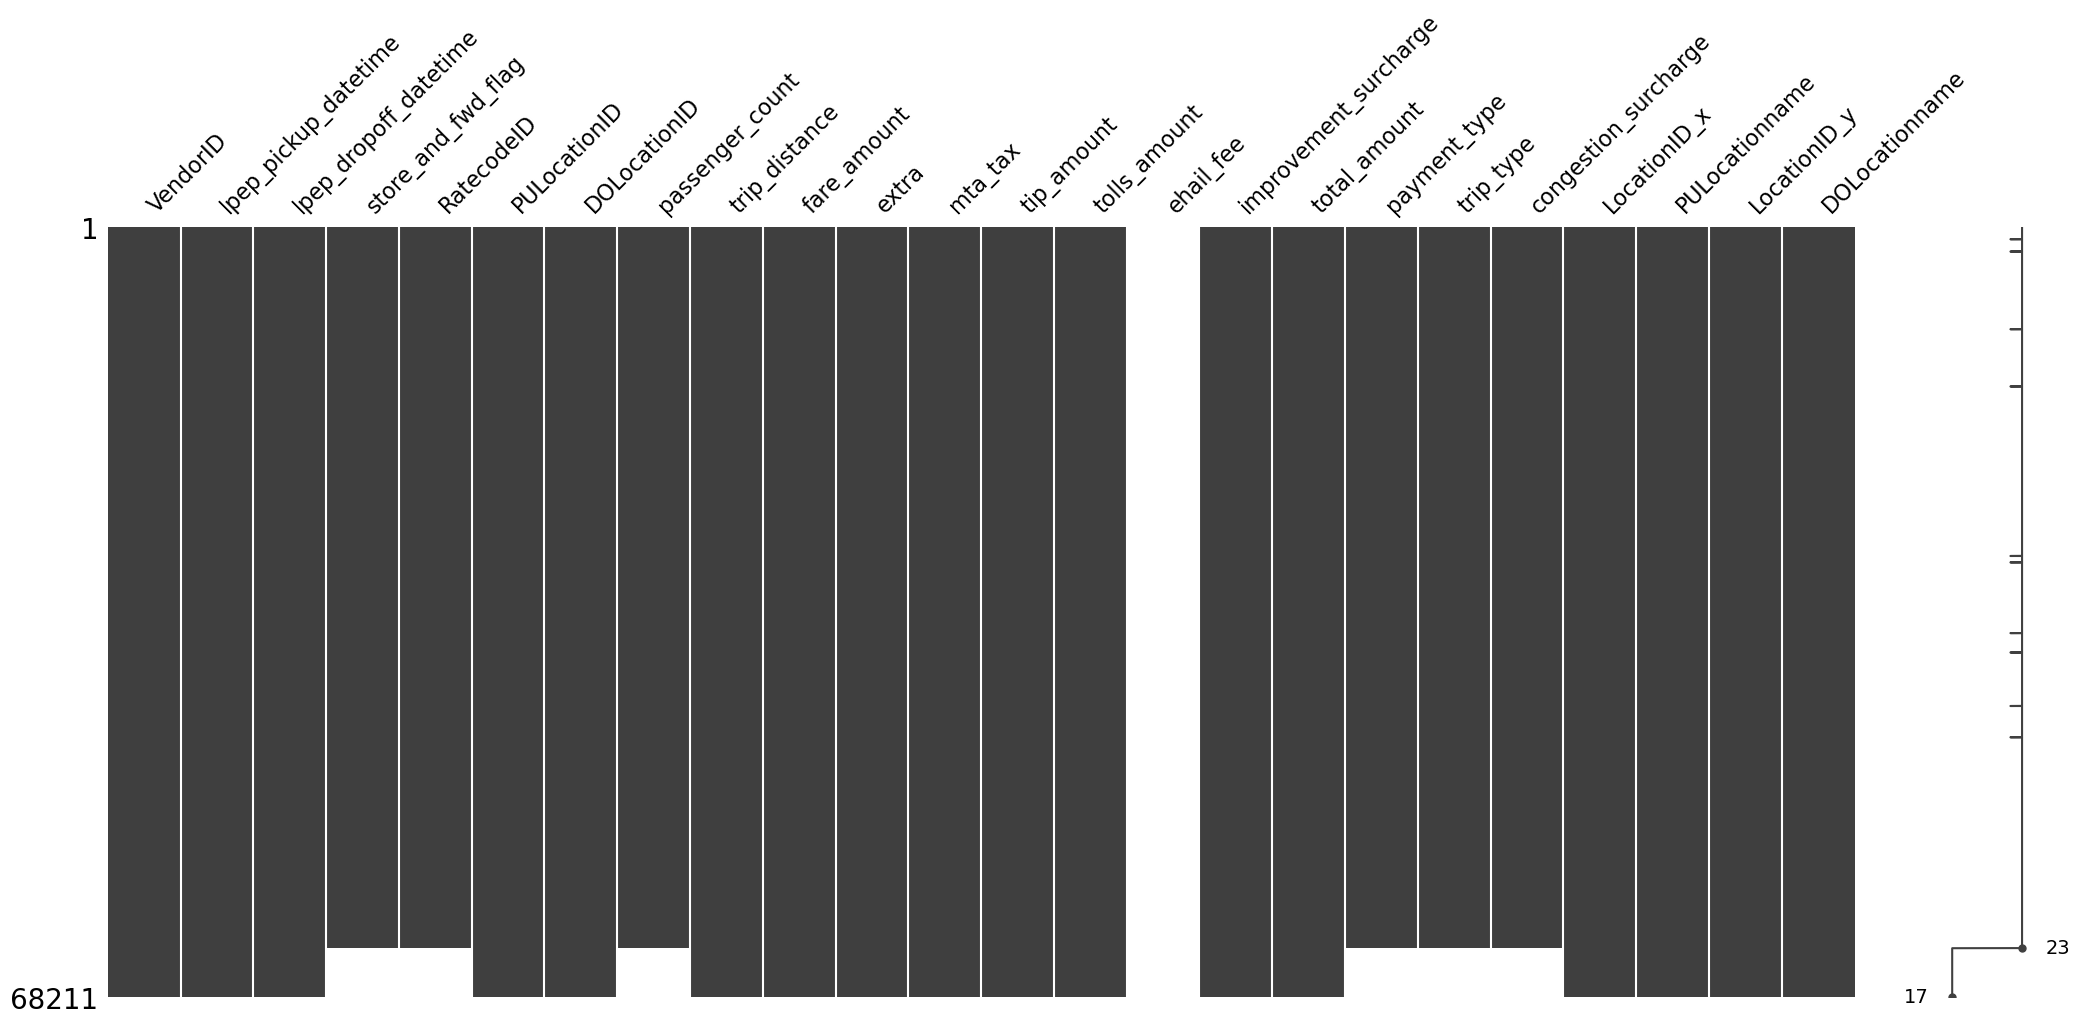

In [4]:
ms.matrix(df),
df

## Distribution Data

In [5]:
from scipy import stats

# Loop trough these numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    column_data = df[col]
    
    # Anderson-Darling test 
    ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(column_data, dist='norm')
    
    # Tampilkan hasil uji Anderson-Darling
    print(f"\nHasil Uji Anderson-Darling untuk Kolom '{col}':")
    print("Anderson-Darling Statistic:", ad_statistic)
    print("Critical Values:", ad_critical_values)
    print("Significance Levels:", ad_significance_levels)

    alpha = 0.05  # Nilai alpha (tingkat signifikansi)

    # Interpretasi hasil uji Anderson-Darling
    if ad_statistic > ad_critical_values[2]:
        print("Uji Anderson-Darling: Hipotesis nol ditolak, data tidak terdistribusi normal.")
    else:
        print("Uji Anderson-Darling: Hipotesis nol diterima, data terdistribusi normal.")
    
    print("\n" + "="*80 + "\n")  # Garis pembatas antar kolom



Hasil Uji Anderson-Darling untuk Kolom 'VendorID':
Anderson-Darling Statistic: 20813.155538546256
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
Uji Anderson-Darling: Hipotesis nol ditolak, data tidak terdistribusi normal.



Hasil Uji Anderson-Darling untuk Kolom 'RatecodeID':
Anderson-Darling Statistic: nan
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
Uji Anderson-Darling: Hipotesis nol diterima, data terdistribusi normal.



Hasil Uji Anderson-Darling untuk Kolom 'PULocationID':
Anderson-Darling Statistic: 4224.208802195761
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
Uji Anderson-Darling: Hipotesis nol ditolak, data tidak terdistribusi normal.



Hasil Uji Anderson-Darling untuk Kolom 'DOLocationID':
Anderson-Darling Statistic: 1374.8188905721472
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.

# ***Data Cleaning***

## Handling Duplicates value
-   looking deeper duplicates value with pairing some selected columns

In [6]:
duplicates = df[df.duplicated(subset=['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID'], keep=False)]
duplicates


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,...,NaN,-1.0,-4.5,3.0,1.0,0.0,75,East Harlem South,74,East Harlem North
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,NaN,1.0,4.5,3.0,1.0,0.0,75,East Harlem South,74,East Harlem North
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,...,NaN,-1.0,-4.5,4.0,1.0,0.0,193,Queensbridge/Ravenswood,193,Queensbridge/Ravenswood
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,NaN,1.0,4.5,4.0,1.0,0.0,193,Queensbridge/Ravenswood,193,Queensbridge/Ravenswood
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,...,NaN,-1.0,-11.1,3.0,1.0,0.0,129,Jackson Heights,82,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,...,NaN,0.3,3.8,3.0,1.0,0.0,74,East Harlem North,74,East Harlem North
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,...,NaN,-1.0,-6.2,3.0,1.0,0.0,256,Williamsburg (South Side),256,Williamsburg (South Side)
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,NaN,1.0,6.2,3.0,1.0,0.0,256,Williamsburg (South Side),256,Williamsburg (South Side)
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,...,NaN,-1.0,-11.0,4.0,2.0,0.0,264,NV,264,NV


- as we see there are some duplicates value within the dataset
- keep the first and drop the unnecessary data

In [7]:
df.drop_duplicates(subset=['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID'], keep='first',inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,NaN,1.0,24.18,1.0,1.0,2.75,166,Morningside Heights,143,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,NaN,1.0,15.84,1.0,1.0,0.00,24,Bloomingdale,43,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,NaN,1.0,11.64,1.0,1.0,0.00,223,Steinway,179,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,NaN,1.0,10.20,1.0,1.0,0.00,41,Central Harlem,238,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,NaN,1.0,8.00,1.0,1.0,0.00,41,Central Harlem,74,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,NaN,1.0,16.70,NaN,NaN,NaN,49,Clinton Hill,62,Crown Heights South
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,NaN,1.0,5.41,NaN,NaN,NaN,10,Baisley Park,205,Saint Albans
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,NaN,1.0,21.04,NaN,NaN,NaN,66,DUMBO/Vinegar Hill,37,Bushwick South
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,NaN,1.0,19.18,NaN,NaN,NaN,225,Stuyvesant Heights,189,Prospect Heights


## Handling Negative Value

In [8]:
# check the negative value within the dataset
pd.DataFrame({
    'feature'           : df.columns.values,
    'Negative_value_num': [len(df[col][df[col] < 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns]}
).round(3)


,feature,Negative_value_num
0,VendorID,0.000
1,lpep_pickup_datetime,0.000
2,lpep_dropoff_datetime,0.000
3,store_and_fwd_flag,0.000
4,RatecodeID,0.000
5,PULocationID,0.000
6,DOLocationID,0.000
7,passenger_count,0.000
8,trip_distance,0.000
9,fare_amount,0.259


-  **we acknowledge there are 7 columns contains negative value** 
[taxi_fare](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)
1. fare_amount
   Negative values in the 'fare_amount' column are not feasible since 'fare_amount' is calculated based on the travel distance multiplied by the cost per 0.2 miles, and the initial fare is added to it  
2. extra
   Negative values in the 'extra' column are not permissible, as passengers will always incur additional charges when categorized as 'rush hour' or 'overnight
3. mta_tax
   It is expected that the 'mta_tax' column should not contain negative values, as this tax is mandatory in accordance with government regulations
4. tip_amount 
   Negative values in the 'tip amount' column are highly unlikely, as if a passenger chooses not to provide a tip, the tip amount will be recorded as 0
5. improvement_surcharge 
   as the rules of taxi fare given above  $0.30 improvement surcharge assessed on hailed trips at the flag drop.
6. total_amount
   Negative values in the 'total amount' column, if there are negative data in the total cost calculation, will significantly impact the 'total_amount' value. 
7. congestion_surcharge
   The occurrence of negative values in the 'total amount' is possible due to the presence of negative values in columns related to the calculation of the total cost

### Handling negative value on 'total_amount'
- Since 'total_amount' is the sum of the total cost, we will perform a re-calculation

In [9]:
selected_columns = [ 'lpep_pickup_datetime', 'lpep_dropoff_datetime','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge']

#check the calculation manually
cek_total_amount= df['fare_amount']+df['extra']+ df['mta_tax']+df['tip_amount']+df['tolls_amount']+df['improvement_surcharge']+df['congestion_surcharge']
cek_total_amount[df[df['total_amount']<0].index]

#change the value of the column total_amount into math operation 
df['total_amount']=df['fare_amount']+df['extra']+ df['mta_tax']+df['tip_amount']+df['tolls_amount']+df['improvement_surcharge']+df['congestion_surcharge']

#check the value still the same which means we didn't change the real value
cek_total_amount[df[df['total_amount']<0].index]

662      -4.5
898      -4.5
1317    -11.1
1686     -5.3
1864     -5.2
         ... 
63358    -7.0
63544    -7.0
63655    -3.8
63807    -6.2
63868   -11.0
Length: 174, dtype: float64

### Handling negative value on 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge' and 'congestion_surcharge'
- change the negative value into positif value

In [10]:

#1 extra
df[df['extra']<0][selected_columns] #Check the negative value in the column extra
df['extra']=df['extra'].abs() #change the negative value into positif value

#2 mta_tax
df[df['mta_tax']<0][selected_columns] #Check the negative value in the column mta_tax
df['mta_tax']=df['mta_tax'].abs() # Change the negative value into positif value

#3 tip_amount
tipbypayment = df.groupby('payment_type')['tip_amount'].sum() 
tipbypayment # Check the negative value with grouping by payment_type and tip_amount
df['tip_amount']=df['tip_amount'].abs() # Changing the negative value into positif value
df.loc[df['tip_amount'] > 0, 'payment_type'] = 1 # only payment_type 1 is allowed to give a tip

#4 improvement_surcharge
df[df['improvement_surcharge']<0][selected_columns] #Check the negative value in the column improvement_surcharge
df['improvement_surcharge']=df['improvement_surcharge'].abs() # Change the negative value into positif value

#5 congestion_surcharge
df[df['congestion_surcharge']<0][selected_columns] #Check the negative value in the column congestion_surcharge
df['congestion_surcharge']=df['congestion_surcharge'].abs() # Change the negative value into positif value

#6 fare_amount
df[df['fare_amount']<0][selected_columns] #Check the negative value in the column fare_amount
df['fare_amount']=df['fare_amount'].abs() # Change the negative value into positif value


In [11]:
# change the value of the column total_amount into math operation 
df['total_amount']=df['fare_amount']+df['extra']+ df['mta_tax']+df['tip_amount']+df['tolls_amount']+df['improvement_surcharge']+df['congestion_surcharge']

# re-check the negative value
df[df['total_amount']<0]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname


## **Handling Zero Value** 

In [12]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns]
    }
).round(3)


,feature,Zero_value_num
0,VendorID,0.000
1,lpep_pickup_datetime,0.000
2,lpep_dropoff_datetime,0.000
3,store_and_fwd_flag,0.000
4,RatecodeID,0.000
5,PULocationID,0.000
6,DOLocationID,0.000
7,passenger_count,0.494
8,trip_distance,4.822
9,fare_amount,0.118


### as we see there are 10 column that contains zero value
-   trip_distance,passenger_count,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge

### Define function 'fare_amount'
- based on [Taxi Fare](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page) we adopted the rules to define the calculated taxi fare function

In [13]:
from datetime import datetime, time

#define function for calculation of taxi fare 
def taxi_fare_calculation(pickup_time, Dropoff_time, passenger_count, trip_distance, PULucationID, DOLcationID, RatecodeID ):    
    
    fare = 0.0
    surcharges = 0.0
    #parse datetime for pickup and dropoff times
    pick_time= datetime.strptime(pickup_time, '%Y-%m-%d %H:%M:%S').time()
    drop_time= datetime.strptime(Dropoff_time, '%Y-%m-%d %H:%M:%S').time()

    # 1. Initial charge 
    fare += 3.00

    # 2. travel charge based on ratecodid and trip distance
    if      RatecodeID == 1: # standart rate
            fare += (trip_distance / 0.2) * 0.70 # which is 70 cents for every 1/5 mile
    elif    RatecodeID == 2: # JFK
            fare += 70.0 
    elif    RatecodeID == 3: # Newark
            fare += 20.0  #newark surcharge
    elif    RatecodeID == 4: # Nassau or Westchester
            fare += (trip_distance / 0.2) * 0.70 * 2 # double the metered fare 
    elif    RatecodeID == 5: # can't determined because the fare is negotiated  
            fare += trip_distance # 

    # 3a. surcharges
    surcharges += 0.50 # this is for MTA state surcharge
    surcharges += 1.00 # this is for improvement surcharge
    
    # 3b. overnight surcharges
    if time(20,0) <= pick_time or pick_time <= time(6, 0):
         surcharges += 1.00 # if picked up between 20:00 - 06:00 overnight surcharge will be added 

    # 3c. rush hour surcharge 
    elif time(16, 0) <= pick_time <= time(20,0):
         surcharges += 2.50 # if picked up between 16:00 - 20:00 rush hour surcharge will be added 
    
    # 3d. NY State Congestion Surcharge (assuming yellow taxi for simplicity)
    surcharges += 2.50
    
    # 3e. Adding surcharges to fare
    if fare is not None:
         fare += surcharges

    return fare

# Test the function
taxi_fare_calculation('2023-01-01 15:30:00', '2023-01-01 16:00:00', 1, 5.0, None, None, 1)

non_zero_td = df['trip_distance'] != 0 # calculate when the trip distance is not 0
df['calculated_fare'] = np.where(
    non_zero_td,
    df.apply(lambda row: taxi_fare_calculation(
        row['lpep_pickup_datetime'], row['lpep_dropoff_datetime'], row['passenger_count'], 
        row['trip_distance'], row['PULocationID'], row['DOLocationID'], row['RatecodeID']), axis=1),
    df['fare_amount']) # Keep the original 'fare_amount' for zero 'trip_distance'

df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,24.18,1.0,1.0,2.75,166,Morningside Heights,143,Lincoln Square West,17.030
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,15.84,1.0,1.0,0.00,24,Bloomingdale,43,Central Park,14.335
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,11.64,1.0,1.0,0.00,223,Steinway,179,Old Astoria,7.200
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,11.20,1.0,1.0,0.00,41,Central Harlem,238,Upper West Side North,12.550
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,9.00,1.0,1.0,0.00,41,Central Harlem,74,East Harlem North,11.850


### Handling zero value - passenger_count
- we asssume that the 1 passenger is dominant so we will change the pasengger_count 0.0 into passenger count 1.0


In [14]:
#checking the passenger with group  by passenger_count,payment_type,trip_type
dfpc= df.groupby(['passenger_count','payment_type','trip_type'])['fare_amount'].sum()
dfpc

# we replace the value "0" in passenger_countinto "1.0"
df['passenger_count'] = df.apply(lambda row: 1.0 if (row['passenger_count'] == 0.0) and 
                                ((row['payment_type'] == 1.0 and row['trip_type'] == 1.0) or 
                                 (row['payment_type'] == 1.0 and row['trip_type'] == 2.0) or 
                                 (row['payment_type'] == 2.0 and row['trip_type'] == 1.0) or 
                                 (row['payment_type'] == 2.0 and row['trip_type'] == 2.0) or 
                                 (row['payment_type'] == 3.0 and row['trip_type'] == 1.0) or 
                                 (row['payment_type'] == 3.0 and row['trip_type'] == 2.0) or 
                                 (row['payment_type'] == 4.0 and row['trip_type'] == 1.0) or 
                                 (row['payment_type'] == 4.0 and row['trip_type'] == 2.0) or
                                 (row['payment_type'] == 5.0 and row['trip_type'] == 1.0) or 
                                 (row['payment_type'] == 5.0 and row['trip_type'] == 2.0) or
                                 (row['payment_type'] == 6.0 and row['trip_type'] == 1.0) or 
                                 (row['payment_type'] == 6.0 and row['trip_type'] == 2.0))
                                else row['passenger_count'], axis=1)
#check that there is no 0 passenger left in passenger_count
dfpc= df.groupby(['passenger_count','payment_type','trip_type'])['fare_amount'].sum()
dfpc


passenger_count  payment_type  trip_type
1.0              1.0           1.0          545069.41
                               2.0           21175.69
                 2.0           1.0          291393.67
                               2.0            9749.91
                 3.0           1.0            2015.00
                               2.0             381.00
                 4.0           1.0             404.90
                               2.0              10.00
                 5.0           1.0              28.00
2.0              1.0           1.0           49286.20
                               2.0            5002.48
                 2.0           1.0           32214.70
                               2.0            1389.47
                 3.0           1.0             161.50
                               2.0               0.00
                 4.0           1.0              28.90
3.0              1.0           1.0            9235.80
                               2.0       

### **Handling zero value - extra**
- from [dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) we acknowledge the information of extra
- Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.


In [15]:
from datetime import datetime, time
def calculate_extra(pickup_time):
    surcharges = 0.0
    pick_time= datetime.strptime(pickup_time, '%Y-%m-%d %H:%M:%S').time()
     # overnight surcharges
    if time(20,0) <= pick_time or pick_time <= time(6,0):
         surcharges += 1.00 # if picked up between 20:00 - 06:00 overnight surcharge will be added 

    # rush hour surcharge 
    elif time(16,0) <= pick_time <= time(20,0):
         surcharges += 0.50 # if picked up between 16:00 - 20:00 rush hour surcharge will be added 
    return surcharges

print(calculate_extra('2023-01-01 00:26:10')) # test the function

df[df['extra']==0] # check the how many data when the extra has a zero value  


1.0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare
16,1,2023-01-01 00:10:45,2023-01-01 00:19:37,N,5.0,83,129,1.0,1.30,15.00,...,0.0,15.00,1.0,2.0,0.00,83,Elmhurst/Maspeth,129,Jackson Heights,9.30
32,2,2023-01-01 00:40:58,2023-01-01 01:04:32,N,5.0,66,164,4.0,6.78,60.00,...,0.3,75.66,1.0,2.0,2.75,66,DUMBO/Vinegar Hill,164,Midtown South,14.78
43,2,2023-01-01 00:16:10,2023-01-01 00:54:55,N,5.0,66,48,3.0,6.19,75.00,...,0.3,78.05,2.0,2.0,2.75,66,DUMBO/Vinegar Hill,48,Clinton East,14.19
55,2,2023-01-01 00:39:52,2023-01-01 00:48:54,N,5.0,129,226,1.0,2.08,15.00,...,1.0,16.00,1.0,2.0,0.00,129,Jackson Heights,226,Sunnyside,10.08
98,2,2023-01-01 00:57:51,2023-01-01 01:07:05,N,5.0,260,74,2.0,5.34,52.00,...,1.0,59.55,1.0,2.0,0.00,260,Woodside,74,East Harlem North,13.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,1.0,NaN,NaN,NaN,NaN,49,Clinton Hill,62,Crown Heights South,8.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,1.0,NaN,NaN,NaN,NaN,10,Baisley Park,205,Saint Albans,8.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,1.0,NaN,1.0,NaN,NaN,66,DUMBO/Vinegar Hill,37,Bushwick South,8.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,1.0,NaN,1.0,NaN,NaN,225,Stuyvesant Heights,189,Prospect Heights,8.00


In [16]:
# reset the appliance of extra column
df['extra'] = df['lpep_pickup_datetime'].apply(calculate_extra)
# verify the changes
df[df['extra']==0][selected_columns]

,lpep_pickup_datetime,lpep_dropoff_datetime,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
292,2023-01-01 06:51:04,2023-01-01 06:54:23,5.80,0.0,0.5,1.46,0.00,1.0,8.76,0.0
293,2023-01-01 07:02:38,2023-01-01 07:08:21,7.90,0.0,0.5,0.00,0.00,1.0,9.40,0.0
294,2023-01-01 06:46:08,2023-01-01 06:55:03,22.60,0.0,0.5,3.00,0.00,1.0,27.10,0.0
295,2023-01-01 06:56:40,2023-01-01 06:58:33,5.10,0.0,0.5,0.00,0.00,1.0,6.60,0.0
296,2023-01-01 06:04:55,2023-01-01 06:04:56,12.00,0.0,0.0,3.90,0.00,1.0,16.90,0.0
...,...,...,...,...,...,...,...,...,...,...
68167,2023-01-31 14:16:00,2023-01-31 14:40:00,20.04,0.0,0.0,9.52,0.00,1.0,NaN,NaN
68168,2023-01-31 14:18:00,2023-01-31 15:32:00,14.91,0.0,0.0,1.59,0.00,1.0,NaN,NaN
68169,2023-01-31 15:37:00,2023-01-31 15:42:00,14.40,0.0,0.0,3.08,0.00,1.0,NaN,NaN
68170,2023-01-31 15:54:00,2023-01-31 16:14:00,14.76,0.0,0.0,3.15,0.00,1.0,NaN,NaN


- The passengger is picked up in regular time will remain has zero value on extra

### **Handling zero value - mta_tax**
- from this site source [taxi_fare](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)
- according to the information given  
- Trips between Manhattan and John F. Kennedy Airport (JFK) in either direction:
- Plus 50 cents MTA State Surcharge.
- The 50 cents MTA State Surcharge must be added to the flat rate for any trip that ends in the following counties: Dutchess, Orange, Putnam, Rockland or Suffolk. 

In [17]:
# Assume that, from the available data, any mta_tax value not equal to 0 represents areas that meet the given criteria. 
# Therefore, we will identify which zones are considered to have an mta_tax of 50 

zone_mta_tax= df[df['mta_tax']!=0]['DOLocationname'].unique()
zone_mta_tax[:10],len(zone_mta_tax)

# df[(df['mta_tax']==0)&(df['trip_distance']!=0)]

(array(['Lincoln Square West', 'Central Park', 'Old Astoria',
        'Upper West Side North', 'East Harlem North', 'Yorkville East',
        'Chinatown', 'East Harlem South', 'Morningside Heights',
        'Lenox Hill East'], dtype=object),
 247)

In [18]:
# so we acknowledge the drop zone area that fit to the mta_tax rules has 247 zone
# We will populate the zero values in column mta_tax field based on the areas we identified earlier.  

# Identify rows where mta_tax is zero but the Zone is in the list of zones_with_mta_tax
mta_tax_update = df[(df['mta_tax']==0) & (df['DOLocationname'].isin(zone_mta_tax))]

# Update the mta_tax value for those rows to 0.5 (50 cents) as per MTA State Surcharge rule
df.loc[mta_tax_update.index, 'mta_tax'] = 0.50

# Verify that the update has been applied
updated_rows = df.loc[mta_tax_update.index]
updated_rows


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare
16,1,2023-01-01 00:10:45,2023-01-01 00:19:37,N,5.0,83,129,1.0,1.30,15.00,...,0.0,15.00,1.0,2.0,0.00,83,Elmhurst/Maspeth,129,Jackson Heights,9.30
32,2,2023-01-01 00:40:58,2023-01-01 01:04:32,N,5.0,66,164,4.0,6.78,60.00,...,0.3,75.66,1.0,2.0,2.75,66,DUMBO/Vinegar Hill,164,Midtown South,14.78
43,2,2023-01-01 00:16:10,2023-01-01 00:54:55,N,5.0,66,48,3.0,6.19,75.00,...,0.3,78.05,2.0,2.0,2.75,66,DUMBO/Vinegar Hill,48,Clinton East,14.19
55,2,2023-01-01 00:39:52,2023-01-01 00:48:54,N,5.0,129,226,1.0,2.08,15.00,...,1.0,16.00,1.0,2.0,0.00,129,Jackson Heights,226,Sunnyside,10.08
98,2,2023-01-01 00:57:51,2023-01-01 01:07:05,N,5.0,260,74,2.0,5.34,52.00,...,1.0,59.55,1.0,2.0,0.00,260,Woodside,74,East Harlem North,13.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,1.0,NaN,NaN,NaN,NaN,49,Clinton Hill,62,Crown Heights South,8.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,1.0,NaN,NaN,NaN,NaN,10,Baisley Park,205,Saint Albans,8.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,1.0,NaN,1.0,NaN,NaN,66,DUMBO/Vinegar Hill,37,Bushwick South,8.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,1.0,NaN,1.0,NaN,NaN,225,Stuyvesant Heights,189,Prospect Heights,8.00


In [19]:
updated_rows[selected_columns]

,lpep_pickup_datetime,lpep_dropoff_datetime,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
16,2023-01-01 00:10:45,2023-01-01 00:19:37,15.00,1.0,0.5,0.00,0.00,0.0,15.00,0.00
32,2023-01-01 00:40:58,2023-01-01 01:04:32,60.00,1.0,0.5,12.61,0.00,0.3,75.66,2.75
43,2023-01-01 00:16:10,2023-01-01 00:54:55,75.00,1.0,0.5,0.00,0.00,0.3,78.05,2.75
55,2023-01-01 00:39:52,2023-01-01 00:48:54,15.00,1.0,0.5,0.00,0.00,1.0,16.00,0.00
98,2023-01-01 00:57:51,2023-01-01 01:07:05,52.00,1.0,0.5,0.00,6.55,1.0,59.55,0.00
...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,15.70,1.0,0.5,0.00,0.00,1.0,NaN,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,4.41,1.0,0.5,0.00,0.00,1.0,NaN,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,16.53,1.0,0.5,3.51,0.00,1.0,NaN,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,14.98,1.0,0.5,3.20,0.00,1.0,NaN,NaN


In [20]:
df[df['mta_tax']==0]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare
66126,2,2023-01-17 13:58:00,2023-01-17 14:09:00,NaN,NaN,185,58,NaN,2.57,19.47,...,1.0,NaN,1.0,NaN,NaN,185,Pelham Parkway,58,Country Club,7.0
67816,2,2023-01-28 20:20:00,2023-01-28 20:34:00,NaN,NaN,167,58,NaN,6.42,19.34,...,1.0,NaN,1.0,NaN,NaN,167,Morrisania/Melrose,58,Country Club,8.0


- since there are only two remain we can drop the remaining zero value on mta_tax

In [21]:
df.drop(df[(df['mta_tax'] == 0)].index, inplace=True)
df[df['mta_tax']==0]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare


### Handling zero value - tip_amount
- As we know, tipping is only required when the payment type is 1. 


In [22]:
df[(df['tip_amount']==0)&(df['payment_type']==1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,9.00,1.0,1.0,0.00,41,Central Harlem,74,East Harlem North,11.850
10,1,2023-01-01 00:16:12,2023-01-01 00:41:43,N,1.0,255,234,2.0,4.80,26.8,...,1.0,35.80,1.0,1.0,2.75,255,Williamsburg (North Side),234,Union Sq,24.800
16,1,2023-01-01 00:10:45,2023-01-01 00:19:37,N,5.0,83,129,1.0,1.30,15.0,...,0.0,15.00,1.0,2.0,0.00,83,Elmhurst/Maspeth,129,Jackson Heights,9.300
55,2,2023-01-01 00:39:52,2023-01-01 00:48:54,N,5.0,129,226,1.0,2.08,15.0,...,1.0,16.00,1.0,2.0,0.00,129,Jackson Heights,226,Sunnyside,10.080
61,2,2023-01-01 00:34:13,2023-01-01 00:43:57,N,1.0,75,41,1.0,1.62,11.4,...,1.0,13.90,1.0,1.0,0.00,75,East Harlem South,41,Central Harlem,13.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63829,2,2023-01-31 22:52:16,2023-01-31 22:56:41,N,1.0,260,83,1.0,1.12,7.2,...,1.0,9.70,1.0,1.0,0.00,260,Woodside,83,Elmhurst/Maspeth,11.920
63835,2,2023-01-31 22:59:41,2023-01-31 23:03:18,N,1.0,82,56,1.0,0.40,5.8,...,1.0,8.30,1.0,1.0,0.00,82,Elmhurst,56,Corona,9.400
63865,2,2023-01-31 23:34:50,2023-01-31 23:47:23,N,1.0,75,48,1.0,3.79,17.7,...,0.3,22.25,1.0,1.0,2.75,75,East Harlem South,48,Clinton East,21.265
63866,2,2023-01-31 23:39:22,2023-01-31 23:46:38,N,1.0,82,82,2.0,1.43,9.3,...,1.0,11.80,1.0,1.0,0.00,82,Elmhurst,82,Elmhurst,13.005


- Since there are no rules mandating a tip for every trip, zero values in this column are considered valid 

### Handling zero value - tolls_amount
- from the available data, there are only  2.559 % has a zero value
- so we assume the most passenger are having trip without passing tolls 

In [23]:
col_pair_tl= ['trip_distance','tolls_amount']
pair_toll_amount = df[(df['tolls_amount'] != 0) & (df['trip_distance'] != 0)].groupby(['PULocationID','DOLocationID']).mean()[col_pair_tl]
pair_toll_amount
 

trip_distance  tolls_amount
PULocationID DOLocationID                             
7            20                   8.9300          6.55
             41                   4.9200          6.55
             43                   5.2300          6.55
             48                   8.0800          6.55
             74                   4.0775          6.55
...                                  ...           ...
260          265                 16.6700         19.30
263          138                  7.9800          6.55
             194                  3.3500          6.55
265          1                   10.5100         12.75
             92                  38.2400         21.30

[650 rows x 2 columns]

### Handling zero value - improvement_surcharge
- according to the rules drom [taxi_fare](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)
- improvement_surcharge is included on every trip 

In [24]:
#check the zero value on improvement_surcharge but trip_distance != 0
df[(df['improvement_surcharge']==0)&(df['trip_distance']!=0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare
16,1,2023-01-01 00:10:45,2023-01-01 00:19:37,N,5.0,83,129,1.0,1.3,15.0,...,0.0,15.0,1.0,2.0,0.00,83,Elmhurst/Maspeth,129,Jackson Heights,9.30
198,1,2023-01-01 03:06:11,2023-01-01 03:06:41,N,5.0,101,101,1.0,1.3,90.0,...,0.0,90.0,3.0,2.0,0.00,101,Glen Oaks,101,Glen Oaks,9.30
199,1,2023-01-01 03:07:26,2023-01-01 03:07:50,N,5.0,101,101,1.0,1.3,60.0,...,0.0,60.0,1.0,2.0,0.00,101,Glen Oaks,101,Glen Oaks,9.30
512,1,2023-01-01 12:02:28,2023-01-01 12:02:59,N,5.0,92,92,1.0,3.4,15.8,...,0.0,15.8,1.0,2.0,0.00,92,Flushing,92,Flushing,10.40
1218,1,2023-01-01 21:53:33,2023-01-01 22:00:38,N,5.0,66,65,2.0,0.8,15.0,...,0.0,15.0,1.0,2.0,0.00,66,DUMBO/Vinegar Hill,65,Downtown Brooklyn/MetroTech,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60315,1,2023-01-30 11:01:25,2023-01-30 11:04:06,N,5.0,244,244,1.0,0.3,0.0,...,0.0,0.0,2.0,2.0,0.00,244,Washington Heights South,244,Washington Heights South,7.30
60340,1,2023-01-30 12:42:39,2023-01-30 12:52:37,Y,1.0,41,74,2.0,1.2,8.0,...,0.0,8.5,2.0,1.0,0.00,41,Central Harlem,74,East Harlem North,11.20
62536,1,2023-01-31 13:16:22,2023-01-31 13:50:31,N,1.0,43,236,1.0,2.6,28.9,...,0.0,41.3,1.0,1.0,2.75,43,Central Park,236,Upper East Side North,16.10
62782,1,2023-01-31 15:42:38,2023-01-31 15:47:06,N,1.0,75,41,1.0,0.7,6.5,...,0.0,8.4,1.0,1.0,0.00,75,East Harlem South,41,Central Harlem,9.45


In [25]:
# Replace all the zero values in improvement_surcharge with 1.00 if trip_distance != 0
df['improvement_surcharge'] = np.where((df['improvement_surcharge'] == 0) & (df['trip_distance'] != 0), 1.00, df['improvement_surcharge'])

# Check to confirm the replacement values
df[(df['improvement_surcharge'] == 0) & (df['trip_distance'] != 0)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare


### Handling zero value - fare_amount

In [26]:
df['fare_amount'] = df.apply(lambda row: taxi_fare_calculation(
    row['lpep_pickup_datetime'], row['lpep_dropoff_datetime'], row['passenger_count'], 
    row['trip_distance'], row['PULocationID'], row['DOLocationID'], row['RatecodeID']) 
    if (row['fare_amount'] == 0) and (row['trip_distance'] != 0) 
    else row['fare_amount'], axis=1)

zero_fare_amount = df[(df['fare_amount'] == 0) & (df['trip_distance']==0)& (df['total_amount'] != 0)]
zero_fare_amount


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare
26585,1,2023-01-14 02:20:29,2023-01-14 02:20:50,N,5.0,92,92,1.0,0.0,0.0,...,0.0,15.00,1.0,2.0,0.0,92,Flushing,92,Flushing,0.0
53433,1,2023-01-26 19:23:42,2023-01-26 19:24:00,N,5.0,92,92,1.0,0.0,0.0,...,0.0,10.00,1.0,2.0,0.0,92,Flushing,92,Flushing,0.0
55868,1,2023-01-27 20:50:47,2023-01-27 20:51:00,N,5.0,177,177,1.0,0.0,0.0,...,0.0,55.00,1.0,2.0,0.0,177,Ocean Hill,177,Ocean Hill,0.0
59336,1,2023-01-29 19:18:43,2023-01-29 19:19:02,N,1.0,97,97,1.0,0.0,0.0,...,0.0,2.75,1.0,1.0,0.0,97,Fort Greene,97,Fort Greene,0.0


- for the remaining data is assumed that the trip is canceled due to the passenger condition

### Handling zero value - congestion_surcharge
- assumed there are no significant information that define which one is yellow taxi and green taxi we will let the value as it is

### Handling zero value - trip distance


In [27]:
def fare_only (RatecodeID, trip_distance):
    fare = 0.0
        #initial fare
    
    # travel charge based on ratecodid and trip distance
    if      RatecodeID == 1: # standart rate
            fare += (trip_distance / 0.2) * 0.70 # which is 70 cents for every 1/5 mile
    elif    RatecodeID == 2: # JFK
            fare += 70.0 
    elif    RatecodeID == 3: # Newark
            fare += 20.0  #newark surcharge
    elif    RatecodeID == 4: # Nassau or Westchester
            fare += (trip_distance / 0.2) * 0.70 * 2 # double the metered fare 
    elif    RatecodeID == 5: # can't determined because the fare is negotiated  
            fare += trip_distance # 
    return fare


# Test the function
fare_only(1.0,2.58)

9.03

In [28]:
non_zero_td = df['trip_distance'] != 0 # calculate when the trip distance is not 0
df['fare_amount_only'] = np.where(
    non_zero_td,
    df.apply(lambda row: fare_only(row['RatecodeID'], row['trip_distance']), axis=1),
    df['fare_amount']  # Keep the original 'fare_amount' for zero 'trip_distance'
)

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,166,Morningside Heights,143,Lincoln Square West,17.030,9.030
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,24,Bloomingdale,43,Central Park,14.335,6.335
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,223,Steinway,179,Old Astoria,7.200,7.200
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,11.20,1.0,1.0,0.00,41,Central Harlem,238,Upper West Side North,12.550,4.550
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,9.00,1.0,1.0,0.00,41,Central Harlem,74,East Harlem North,11.850,3.850


In [29]:
df[df['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.20,...,11.64,1.0,1.0,0.0,223,Steinway,179,Old Astoria,7.20,7.20
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.40,...,8.28,1.0,1.0,0.0,75,East Harlem South,75,East Harlem South,4.40,4.40
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,1.0,0.0,20.00,...,21.00,1.0,2.0,0.0,168,Mott Haven/Port Morris,168,Mott Haven/Port Morris,20.00,20.00
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.00,...,14.50,1.0,1.0,0.0,7,Astoria,7,Astoria,3.00,3.00
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.00,...,26.30,1.0,1.0,0.0,264,NV,264,NV,3.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2,2023-01-30 13:29:00,2023-01-30 14:15:00,NaN,NaN,14,75,NaN,0.0,51.12,...,NaN,1.0,NaN,NaN,14,Bay Ridge,75,East Harlem South,51.12,51.12
68112,2,2023-01-31 08:36:00,2023-01-31 08:51:00,NaN,NaN,41,75,NaN,0.0,15.56,...,NaN,NaN,NaN,NaN,41,Central Harlem,75,East Harlem South,15.56,15.56
68136,1,2023-01-31 11:10:20,2023-01-31 11:45:20,NaN,NaN,42,132,NaN,0.0,70.50,...,NaN,1.0,NaN,NaN,42,Central Harlem North,132,JFK Airport,70.50,70.50
68161,2,2023-01-31 13:53:00,2023-01-31 14:17:00,NaN,NaN,7,145,NaN,0.0,23.43,...,NaN,1.0,NaN,NaN,7,Astoria,145,Long Island City/Hunters Point,23.43,23.43


In [30]:
df['trip_distance'] = df.apply(lambda row: (row['fare_amount_only'] / 0.70 * 0.2 )
    if (row['trip_distance'] == 0) and (row['total_amount'] != 0) and (row['RatecodeID'] == 1) or (row['RatecodeID'] == 4) 
    and not pd.isna(row['calculated_fare']) and not pd.isna(row['total_amount'])
    else row['trip_distance'] if not pd.isna(row['trip_distance']) else 0,  # Keep trip_distance as is if it's not NaN, otherwise set it to 0
    axis=1)

# zero_td= df[(df['trip_distance']==0)&(df['total_amount']!=0)]
# zero_td


In [31]:
df[df['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,1.0,0.0,20.00,...,21.0,1.0,2.0,0.0,168,Mott Haven/Port Morris,168,Mott Haven/Port Morris,20.00,20.00
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.0,40.00,...,41.0,1.0,2.0,0.0,51,Co-Op City,264,NV,40.00,40.00
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,260,264,1.0,0.0,20.00,...,25.2,1.0,2.0,0.0,260,Woodside,264,NV,20.00,20.00
185,2,2023-01-01 02:09:48,2023-01-01 02:11:34,N,5.0,223,223,1.0,0.0,110.00,...,111.0,2.0,2.0,0.0,223,Steinway,223,Steinway,110.00,110.00
186,2,2023-01-01 03:01:54,2023-01-01 03:01:56,N,5.0,129,264,1.0,0.0,12.00,...,13.0,1.0,2.0,0.0,129,Jackson Heights,264,NV,12.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2,2023-01-30 13:29:00,2023-01-30 14:15:00,NaN,NaN,14,75,NaN,0.0,51.12,...,NaN,1.0,NaN,NaN,14,Bay Ridge,75,East Harlem South,51.12,51.12
68112,2,2023-01-31 08:36:00,2023-01-31 08:51:00,NaN,NaN,41,75,NaN,0.0,15.56,...,NaN,NaN,NaN,NaN,41,Central Harlem,75,East Harlem South,15.56,15.56
68136,1,2023-01-31 11:10:20,2023-01-31 11:45:20,NaN,NaN,42,132,NaN,0.0,70.50,...,NaN,1.0,NaN,NaN,42,Central Harlem North,132,JFK Airport,70.50,70.50
68161,2,2023-01-31 13:53:00,2023-01-31 14:17:00,NaN,NaN,7,145,NaN,0.0,23.43,...,NaN,1.0,NaN,NaN,7,Astoria,145,Long Island City/Hunters Point,23.43,23.43


- trip distance is the absolut value for us to define the fare and other condition
- Since the ultimate goal is passenger or dropoff-specific, we cannot have precise data on trip distance. Therefore, when the fare amount is $70.0, it indicates RateCodeID 2, and if the fare amount is $70.0 with a trip distance of 0, you can safely remove those rows.

In [32]:

df[(df['trip_distance'] == 0) & ((df['fare_amount'] == 70.0) & (df['RatecodeID'] == 2) | (df['fare_amount'] == 20.0) & (df['RatecodeID'] == 3))]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
247,2,2023-01-01 03:55:21,2023-01-01 03:55:32,N,2.0,179,179,1.0,0.0,70.0,...,71.50,1.0,1.0,0.0,179,Old Astoria,179,Old Astoria,70.0,70.0
456,2,2023-01-01 11:40:14,2023-01-01 11:40:34,N,2.0,65,65,1.0,0.0,70.0,...,71.50,2.0,1.0,0.0,65,Downtown Brooklyn/MetroTech,65,Downtown Brooklyn/MetroTech,70.0,70.0
757,2,2023-01-01 15:33:53,2023-01-01 15:34:13,N,2.0,74,74,1.0,0.0,70.0,...,71.50,2.0,1.0,0.0,74,East Harlem North,74,East Harlem North,70.0,70.0
1531,1,2023-01-02 10:51:50,2023-01-02 10:51:53,N,2.0,145,145,1.0,0.0,70.0,...,72.50,3.0,1.0,0.0,145,Long Island City/Hunters Point,145,Long Island City/Hunters Point,70.0,70.0
6361,2,2023-01-04 19:00:17,2023-01-04 19:00:23,N,2.0,75,75,1.0,0.0,70.0,...,76.50,2.0,1.0,0.0,75,East Harlem South,75,East Harlem South,70.0,70.0
10009,2,2023-01-06 12:39:33,2023-01-06 12:39:45,N,2.0,226,226,1.0,0.0,70.0,...,70.80,2.0,1.0,0.0,226,Sunnyside,226,Sunnyside,70.0,70.0
11874,2,2023-01-07 08:34:33,2023-01-07 08:34:37,N,2.0,92,92,1.0,0.0,70.0,...,71.50,2.0,1.0,0.0,92,Flushing,92,Flushing,70.0,70.0
12574,2,2023-01-07 14:19:00,2023-01-07 14:19:05,N,2.0,133,133,1.0,0.0,70.0,...,71.50,2.0,1.0,0.0,133,Kensington,133,Kensington,70.0,70.0
16461,2,2023-01-09 16:03:09,2023-01-09 17:00:44,N,2.0,75,93,1.0,0.0,70.0,...,106.05,1.0,1.0,0.0,75,East Harlem South,93,Flushing Meadows-Corona Park,70.0,70.0
17233,2,2023-01-09 21:30:13,2023-01-09 21:30:50,N,2.0,95,95,1.0,0.0,70.0,...,71.50,3.0,1.0,0.0,95,Forest Hills,95,Forest Hills,70.0,70.0


In [33]:
# drop any trip distance from ratecodeid 2 and 3 when the trip_distance is 0
df.drop(df[(df['trip_distance'] == 0) & ((df['fare_amount'] == 70.0) & (df['RatecodeID'] == 2) | (df['fare_amount'] == 20.0) & (df['RatecodeID'] == 3))].index, inplace=True)



In [34]:
# verify the changes
df[(df['trip_distance'] == 0) & ((df['fare_amount'] == 70.0) & (df['RatecodeID'] == 2) | (df['fare_amount'] == 20.0) & (df['RatecodeID'] == 3))]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only


### Handling zero value total amount
- we will perform a re-calculation, because 'total_amount' is the sum of the total cost,  

In [35]:
df[(df['total_amount']==0)&df['trip_distance']!=0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
21813,1,2023-01-12 03:50:04,2023-01-12 03:51:07,N,5.0,73,73,1.0,2.1,10.1,...,0.0,2.0,2.0,0.0,73,East Flushing,73,East Flushing,10.1,2.1
40820,1,2023-01-21 03:36:32,2023-01-21 03:37:20,N,5.0,265,265,1.0,28.8,36.8,...,0.0,4.0,2.0,0.0,265,other,265,other,36.8,28.8
44826,1,2023-01-23 10:38:28,2023-01-23 10:57:41,N,5.0,129,223,2.0,3.3,10.3,...,0.0,2.0,2.0,0.0,129,Jackson Heights,223,Steinway,10.3,3.3
45261,1,2023-01-23 13:27:55,2023-01-23 14:35:24,N,5.0,56,260,1.0,18.2,25.2,...,0.0,2.0,2.0,0.0,56,Corona,260,Woodside,25.2,18.2
47269,1,2023-01-24 11:01:43,2023-01-24 11:14:46,N,5.0,42,69,1.0,2.2,9.2,...,0.0,2.0,2.0,0.0,42,Central Harlem North,69,East Concourse/Concourse Village,9.2,2.2
51901,1,2023-01-26 10:50:42,2023-01-26 10:51:30,N,5.0,41,75,2.0,0.1,7.1,...,0.0,3.0,2.0,0.0,41,Central Harlem,75,East Harlem South,7.1,0.1
53188,1,2023-01-26 18:29:07,2023-01-26 19:35:46,N,5.0,93,10,2.0,13.4,22.9,...,0.0,2.0,2.0,0.0,93,Flushing Meadows-Corona Park,10,Baisley Park,22.9,13.4
53542,1,2023-01-26 20:35:35,2023-01-26 21:44:25,N,5.0,10,10,1.0,20.8,28.8,...,0.0,2.0,2.0,0.0,10,Baisley Park,10,Baisley Park,28.8,20.8
60315,1,2023-01-30 11:01:25,2023-01-30 11:04:06,N,5.0,244,244,1.0,0.3,7.3,...,0.0,2.0,2.0,0.0,244,Washington Heights South,244,Washington Heights South,7.3,0.3


In [36]:
df['total_amount']= df.apply(lambda row: row['fare_amount'] + row['extra']+row['tip_amount']+row['mta_tax']+row['tolls_amount']+row['improvement_surcharge'] 
                             if (row['total_amount'] == 0) and (row['trip_distance'] != 0) else row['total_amount'], axis=1)

In [37]:
df[(df['total_amount']==0)&(df['trip_distance']!=0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only


## Handling Nan Value

In [38]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'null_value(%)'     : df.isna().mean().values * 100
    }).round(3)


,feature,null_value(%)
0,VendorID,0.000
1,lpep_pickup_datetime,0.000
2,lpep_dropoff_datetime,0.000
3,store_and_fwd_flag,6.355
4,RatecodeID,6.355
5,PULocationID,0.000
6,DOLocationID,0.000
7,passenger_count,6.355
8,trip_distance,0.000
9,fare_amount,0.000


### **Handling nan values - ehail_fee**
- Ehail_fee, which has 100% NaN values, can be removed as it will not provide useful information.%

<Axes: >

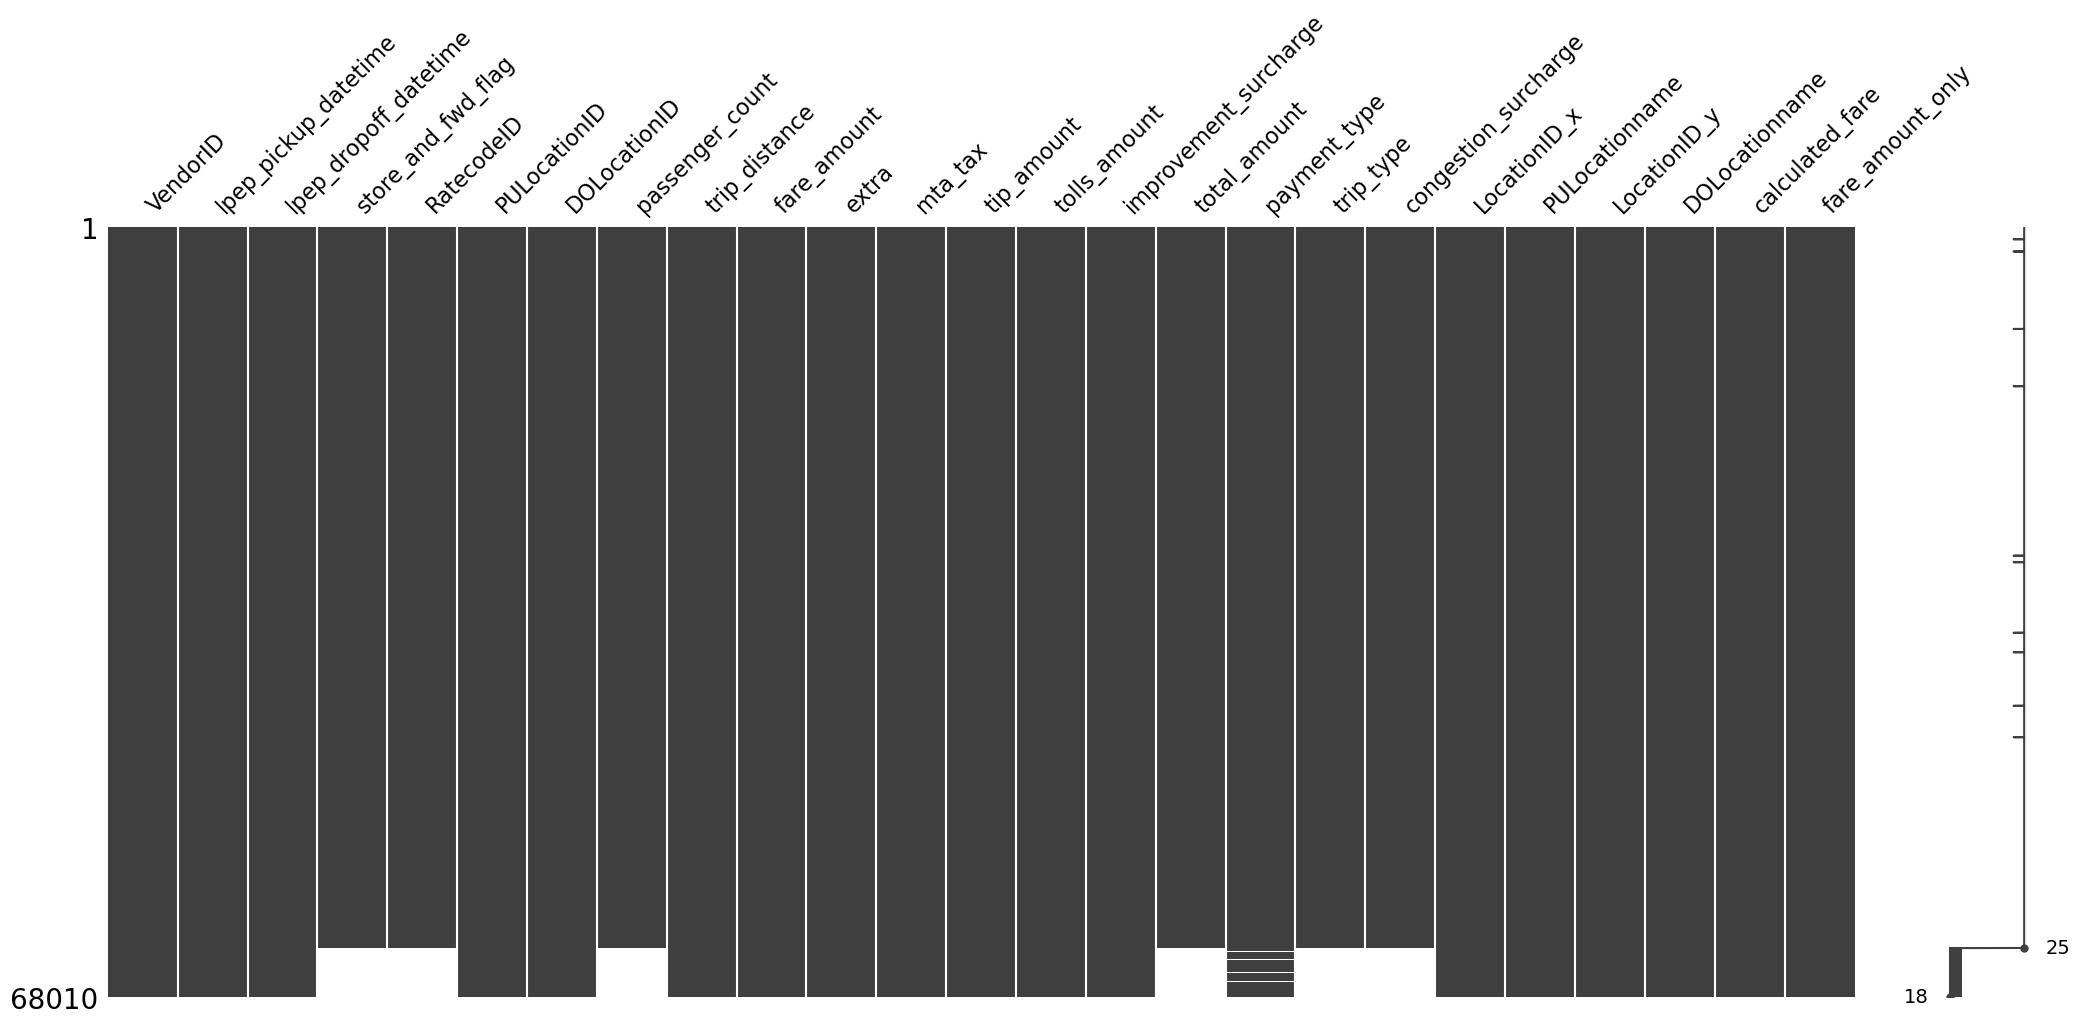

In [39]:
# Drop column with 100% NaN values
df.drop(columns=['ehail_fee'], inplace=True)
# verify the column ehail_fee is dropped
ms.matrix(df)

### **Handling nan values - RatecodeID**
- fill the nan value according to rules 

In [40]:
# define function to categorize RatecodeID basen on drop zone
def ratecodeid_selection(zone):
    if zone is None:
        return df['Zone']
    zone = zone.lower()
    if "jfk" in zone:
        return 2
    elif "newark" in zone:
        return 3
    elif "nassau" in zone or "westchester" in zone:
        return 4
    else:
        return 1

#apply the function to fill the nan value 
df['RatecodeID'].fillna(df['DOLocationname'].apply(ratecodeid_selection), inplace=True)

pd.DataFrame({
    'feature': ['RatecodeID'],
    'null_value(%)': df['RatecodeID'].isna().mean() * 100
}).round(3)


,feature,null_value(%)
0,RatecodeID,0.0


In [41]:
df['RatecodeID'].value_counts()

1.0     66147
5.0      1520
2.0       240
4.0        60
3.0        33
99.0       10
Name: RatecodeID, dtype: int64

- since there are only 10 rows contain 99 that is not include in the category we eill drop RatecodID 99

In [42]:
df.drop(df[(df['RatecodeID'] == 99)].index, inplace=True) # delete RatecodeID 99
df['RatecodeID'].value_counts() # verify RatecodeID 99 is deleted


1.0    66147
5.0     1520
2.0      240
4.0       60
3.0       33
Name: RatecodeID, dtype: int64

### **Handling nan values - trip_type**


In [43]:
pd.DataFrame({
    'feature': ['trip_type'],
    'null_value(%)': df['trip_type'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,trip_type,6.356


In [44]:
df['trip_type'].value_counts()

1.0    62285
2.0     1393
Name: trip_type, dtype: int64

- trip_type 1 is the most common used by passenger so we fill the nan value as trip_type 1

In [45]:
# impute trip_type to 1 (Street-hail)
df['trip_type'].fillna(1,inplace=True)

# Verify that the NaN values have been properly handled 
pd.DataFrame({
    'feature': ['trip_type'],
    'null_value(%)': df['trip_type'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,trip_type,0.0


### **Handling nan values - payment_type**
- payment_type 1 and 2 is the most common used by passenger so we fill the nan value as payment_type 1 or 2 randomly

In [46]:
pd.DataFrame({
    'feature': ['payment_type'],
    'null_value(%)': df['payment_type'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,payment_type,0.725


In [47]:
# Impute 'payment_type' randomly to 1 (Credit Card) or 2 (Cash)
nan_payment_type = df['payment_type'].index[df['payment_type'].apply(np.isnan)] # targeting the nan value to handle
payment_type_option= np.random.choice([1, 2], size= len(nan_payment_type)) # randomly pick 50:50 to option 1 or 2
df.loc[nan_payment_type, 'payment_type'] = payment_type_option

# Verify that the NaN values have been properly handled 
pd.DataFrame({
    'feature': ['payment_type'],
    'null_value(%)': df['payment_type'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,payment_type,0.0


### **Handling nan values - passenger_count**


In [48]:
pd.DataFrame({
    'feature': ['passenger_count'],
    'null_value(%)': df['passenger_count'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,passenger_count,6.356


In [49]:
df['passenger_count'].value_counts()

1.0    54479
2.0     5059
5.0     1767
6.0     1052
3.0      951
4.0      362
7.0        4
9.0        2
8.0        2
Name: passenger_count, dtype: int64

- Impute 'passenger_count' to 1 (most dominant)

In [50]:
df['passenger_count'].fillna(1, inplace=True) 

# Verify that the NaN values have been properly handled 
pd.DataFrame({
    'feature': ['passenger_count'],
    'null_value(%)': df['passenger_count'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,passenger_count,0.0


### **Handling nan values - store_and_fwd_flag**
- Assuming the stats suggest that 'N' is more common for 'trip_type' 1

In [51]:
pd.DataFrame({
    'feature': ['store_and_fwd_flag'],
    'null_value(%)': df['store_and_fwd_flag'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,store_and_fwd_flag,6.356


In [52]:
# Check the 'store_and_fwd_flag' based on 'trip_type'
store_and_fwd_stats = df.groupby('trip_type')['store_and_fwd_flag'].value_counts()
store_and_fwd_stats

trip_type  store_and_fwd_flag
1.0        N                     61977
           Y                       308
2.0        N                      1393
Name: store_and_fwd_flag, dtype: int64

In [53]:
# applying the 'N' is more common for 'trip_type' 1
df['store_and_fwd_flag'].fillna('N', inplace=True)

# Verify that the NaN values have been properly handled 
pd.DataFrame({
    'feature': ['store_and_fwd_flag'],
    'null_value(%)': df['store_and_fwd_flag'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,store_and_fwd_flag,0.0


### **Handling nan values - congestion_surcharge**
- because there is no further information to define which passenger using yellow taxi or green taxi 
- we will fill the nan value as 0.00 

In [54]:
pd.DataFrame({
    'feature': ['congestion_surcharge'],
    'null_value(%)': df['congestion_surcharge'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,congestion_surcharge,6.356


In [55]:
df['congestion_surcharge'].fillna(0.0, inplace=True) # changing the nan into 0.00

# Verify that the NaN values have been properly handled 
pd.DataFrame({
    'feature': ['congestion_surcharge'],
    'null_value(%)': df['congestion_surcharge'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,congestion_surcharge,0.0


### **Handling nan values - total_amount**
- recalculating the total_amount to fill the nan value

In [56]:
# Recalculate 'total_amount'
df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'] + df.get('congestion_surcharge', 0)

# Verify that the NaN values have been properly handled 
pd.DataFrame({
    'feature': ['total_amount'],
    'null_value(%)': df['total_amount'].isna().mean() * 100
}).round(3)

,feature,null_value(%)
0,total_amount,0.0


<Axes: >

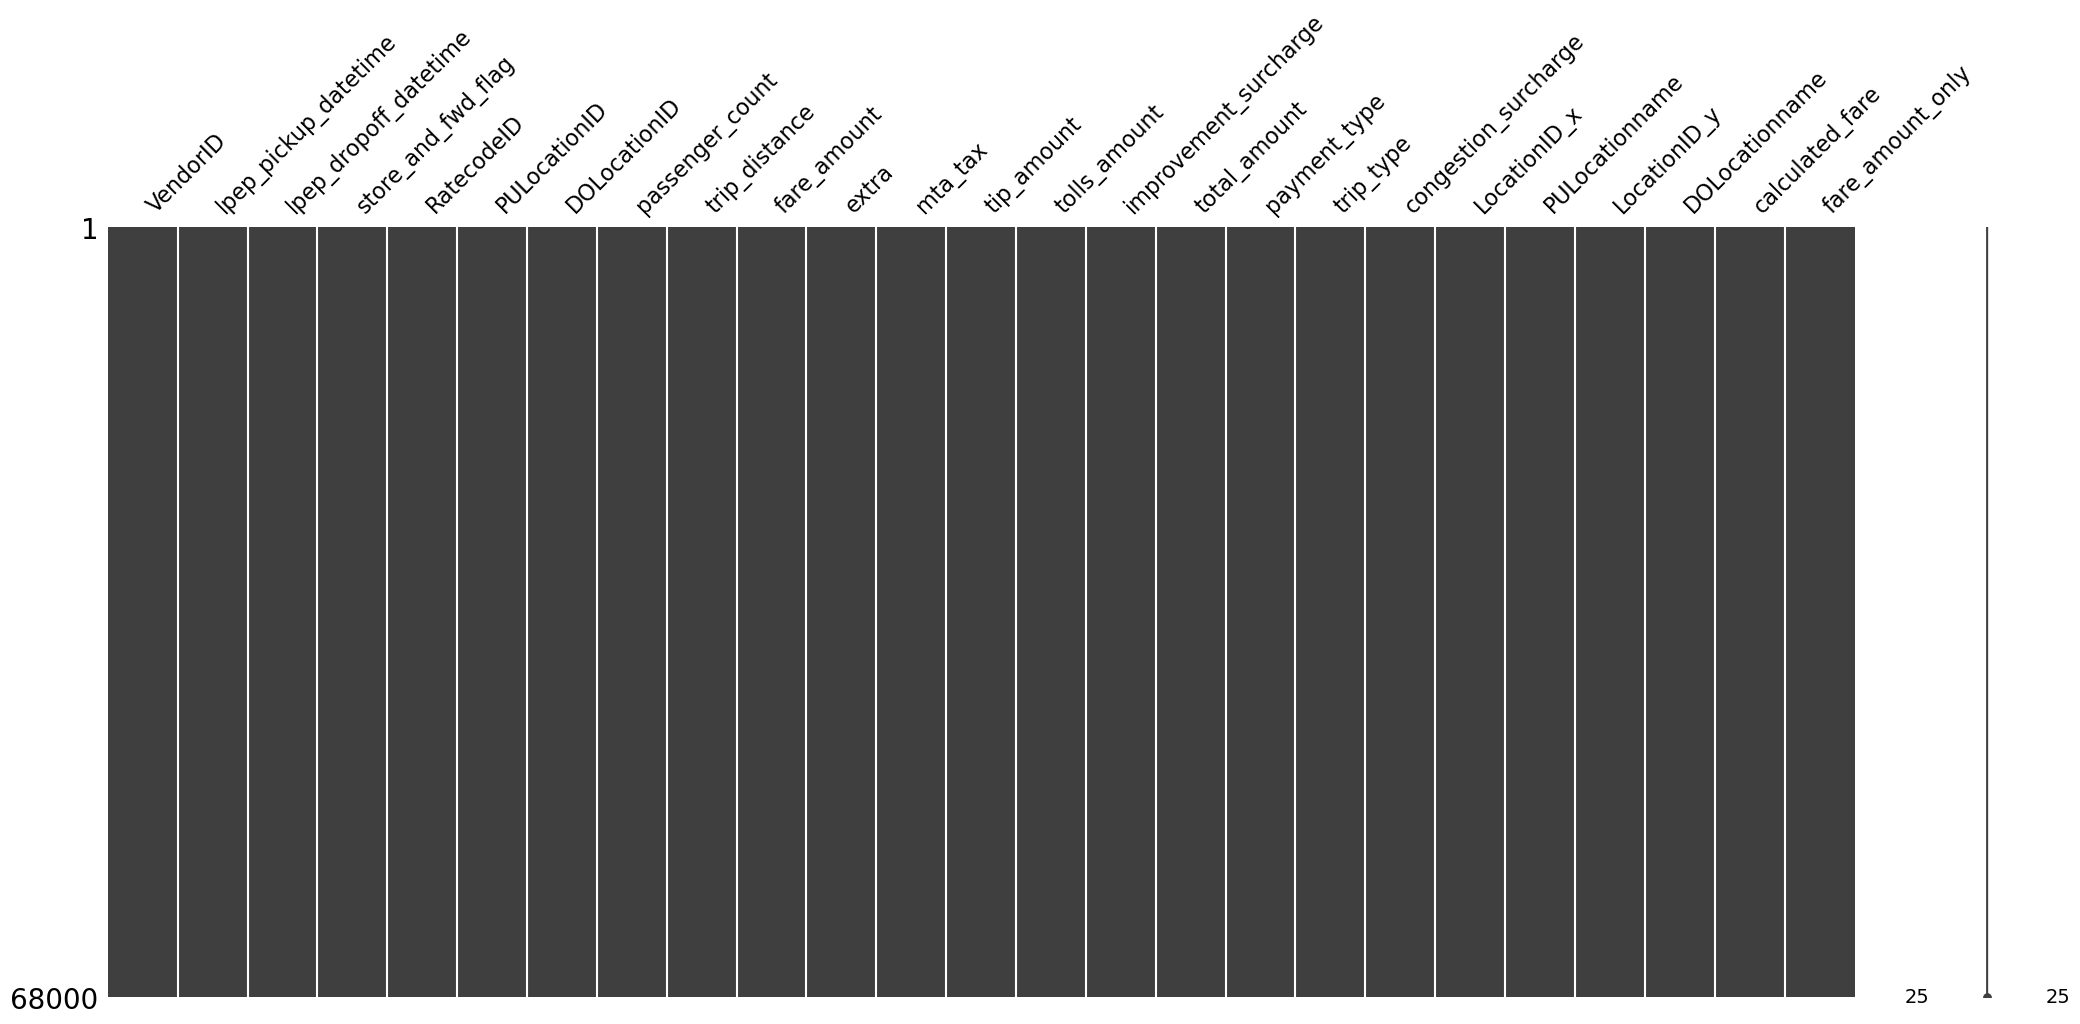

In [57]:
ms.matrix(df)

## Handling checking

In [58]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value(%)'     : df.isna().mean().values * 100,
    'n_unique'          : df.nunique().values,
    'duplicate'         : df.duplicated().sum(),
    'Negative_value_num': [len(df[col][df[col] < 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_obj'    : [len(df[col][df[col] == ''])/ len(df) * 100 if col in df.select_dtypes(include=np.object_).columns else 0 for col in df.columns],
    'sample_unique'     : [df[col].unique() for col in df.columns]}
).round(3)


,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,VendorID,int64,0.0,2,0,0.0,0.000,0.0,"[2, 1]"
1,lpep_pickup_datetime,object,0.0,66538,0,0.0,0.000,0.0,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.0,66485,0,0.0,0.000,0.0,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0.0,2,0,0.0,0.000,0.0,"[N, Y]"
4,RatecodeID,float64,0.0,5,0,0.0,0.000,0.0,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0.0,226,0,0.0,0.000,0.0,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.0,248,0,0.0,0.000,0.0,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,0.0,9,0,0.0,0.000,0.0,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 7.0, 9.0, 8.0]"
8,trip_distance,float64,0.0,2032,0,0.0,1.135,0.0,"[2.58, 1.81, 2.0571428571428574, 1.3, 1.1, 2.7..."
9,fare_amount,float64,0.0,2538,0,0.0,0.094,0.0,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


In [59]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    }).round(3)


,feature,Zero_value_num
0,VendorID,0.000
1,lpep_pickup_datetime,0.000
2,lpep_dropoff_datetime,0.000
3,store_and_fwd_flag,0.000
4,RatecodeID,0.000
5,PULocationID,0.000
6,DOLocationID,0.000
7,passenger_count,0.000
8,trip_distance,1.135
9,fare_amount,0.094


- we will analyze the remaining zero value 

### checking - trip distance remaining zero value

In [60]:
df[df['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,1.0,0.0,20.00,...,22.50,1.0,2.0,0.0,168,Mott Haven/Port Morris,168,Mott Haven/Port Morris,20.00,20.00
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.0,40.00,...,42.50,1.0,2.0,0.0,51,Co-Op City,264,NV,40.00,40.00
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,260,264,1.0,0.0,20.00,...,26.70,1.0,2.0,0.0,260,Woodside,264,NV,20.00,20.00
185,2,2023-01-01 02:09:48,2023-01-01 02:11:34,N,5.0,223,223,1.0,0.0,110.00,...,112.50,2.0,2.0,0.0,223,Steinway,223,Steinway,110.00,110.00
186,2,2023-01-01 03:01:54,2023-01-01 03:01:56,N,5.0,129,264,1.0,0.0,12.00,...,14.50,1.0,2.0,0.0,129,Jackson Heights,264,NV,12.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2,2023-01-30 13:29:00,2023-01-30 14:15:00,N,1.0,14,75,1.0,0.0,51.12,...,60.34,1.0,1.0,0.0,14,Bay Ridge,75,East Harlem South,51.12,51.12
68112,2,2023-01-31 08:36:00,2023-01-31 08:51:00,N,1.0,41,75,1.0,0.0,15.56,...,17.06,1.0,1.0,0.0,41,Central Harlem,75,East Harlem South,15.56,15.56
68136,1,2023-01-31 11:10:20,2023-01-31 11:45:20,N,2.0,42,132,1.0,0.0,70.50,...,82.80,1.0,1.0,0.0,42,Central Harlem North,132,JFK Airport,70.50,70.50
68161,2,2023-01-31 13:53:00,2023-01-31 14:17:00,N,1.0,7,145,1.0,0.0,23.43,...,29.82,1.0,1.0,0.0,7,Astoria,145,Long Island City/Hunters Point,23.43,23.43


#### re-calculate trip_distance

In [61]:
df['trip_distance'] = df.apply(lambda row: (row['fare_amount_only'] / 0.70 * 0.2 )
    if (row['trip_distance'] == 0) and (row['total_amount'] != 0) and (row['RatecodeID'] == 1) or (row['RatecodeID'] == 4) 
    and not pd.isna(row['calculated_fare']) and not pd.isna(row['total_amount'])
    else row['trip_distance'] if not pd.isna(row['trip_distance']) else 0,  # Keep trip_distance as is if it's not NaN, otherwise set it to 0
    axis=1)

# zero_td= df[(df['trip_distance']==0)&(df['total_amount']!=0)]
# zero_td


In [62]:
df[df['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,1.0,0.0,20.00,...,22.50,1.0,2.0,0.0,168,Mott Haven/Port Morris,168,Mott Haven/Port Morris,20.00,20.00
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.0,40.00,...,42.50,1.0,2.0,0.0,51,Co-Op City,264,NV,40.00,40.00
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,260,264,1.0,0.0,20.00,...,26.70,1.0,2.0,0.0,260,Woodside,264,NV,20.00,20.00
185,2,2023-01-01 02:09:48,2023-01-01 02:11:34,N,5.0,223,223,1.0,0.0,110.00,...,112.50,2.0,2.0,0.0,223,Steinway,223,Steinway,110.00,110.00
186,2,2023-01-01 03:01:54,2023-01-01 03:01:56,N,5.0,129,264,1.0,0.0,12.00,...,14.50,1.0,2.0,0.0,129,Jackson Heights,264,NV,12.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65188,2,2023-01-11 01:58:00,2023-01-11 02:26:00,N,3.0,230,1,1.0,0.0,99.35,...,157.95,1.0,1.0,0.0,230,Times Sq/Theatre District,1,Newark Airport,99.35,99.35
65440,2,2023-01-12 15:53:00,2023-01-12 16:24:00,N,4.0,243,250,1.0,0.0,29.17,...,30.67,1.0,1.0,0.0,243,Washington Heights North,250,Westchester Village/Unionport,7.00,0.00
66609,2,2023-01-20 12:17:00,2023-01-20 12:18:00,N,2.0,132,132,1.0,0.0,78.25,...,95.60,1.0,1.0,0.0,132,JFK Airport,132,JFK Airport,78.25,78.25
68048,2,2023-01-30 17:03:00,2023-01-30 17:29:00,N,4.0,75,250,1.0,0.0,31.78,...,38.78,1.0,1.0,0.0,75,East Harlem South,250,Westchester Village/Unionport,9.50,0.00


- for this remaining zero value on trip distance is assumed that the trip has been canceled due to the passenger condition so we can safely drop this data

In [63]:
df.drop(df[(df['trip_distance'] == 0)].index, inplace=True) # delete zero trip_distance
df[df['trip_distance']==0] # verify the zero trip distance

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only


In [64]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    }).round(3)


,feature,Zero_value_num
0,VendorID,0.000
1,lpep_pickup_datetime,0.000
2,lpep_dropoff_datetime,0.000
3,store_and_fwd_flag,0.000
4,RatecodeID,0.000
5,PULocationID,0.000
6,DOLocationID,0.000
7,passenger_count,0.000
8,trip_distance,0.000
9,fare_amount,0.000


### checking - improvement zero value

In [65]:
non_zero_td = df['trip_distance'] != 0 # calculate when the trip distance is not 0
df['fare_amount_only'] = np.where(
    non_zero_td,
    df.apply(lambda row: fare_only(row['RatecodeID'], row['trip_distance']), axis=1),
    df['fare_amount']  # Keep the original 'fare_amount' for zero 'trip_distance'
)

pd.DataFrame({
    'feature'           : df.columns.values,
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    }).round(3)


,feature,Zero_value_num
0,VendorID,0.000
1,lpep_pickup_datetime,0.000
2,lpep_dropoff_datetime,0.000
3,store_and_fwd_flag,0.000
4,RatecodeID,0.000
5,PULocationID,0.000
6,DOLocationID,0.000
7,passenger_count,0.000
8,trip_distance,0.000
9,fare_amount,0.000


In [66]:
df[df['improvement_surcharge']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,PULocationname,LocationID_y,DOLocationname,calculated_fare,fare_amount_only
2289,1,2023-01-02 17:07:45,2023-01-02 17:26:42,N,1.0,73,82,1.0,7.142857,25.0,...,26.00,5.0,1.0,0.00,73,East Flushing,82,Elmhurst,25.0,25.0
3592,1,2023-01-03 13:51:21,2023-01-03 13:51:21,Y,1.0,18,264,1.0,11.914286,41.7,...,48.75,2.0,1.0,0.00,18,Bedford Park,264,NV,41.7,41.7
3699,1,2023-01-03 14:46:21,2023-01-03 14:46:21,Y,1.0,16,264,1.0,11.914286,41.7,...,42.20,2.0,1.0,0.00,16,Bayside,264,NV,41.7,41.7
6306,1,2023-01-04 17:34:46,2023-01-04 17:34:46,N,1.0,97,264,1.0,0.857143,3.0,...,4.00,2.0,1.0,0.00,97,Fort Greene,264,NV,3.0,3.0
12995,1,2023-01-07 17:59:37,2023-01-07 18:26:03,N,1.0,82,82,1.0,6.200000,21.7,...,22.70,4.0,1.0,0.00,82,Elmhurst,82,Elmhurst,21.7,21.7
15754,1,2023-01-09 10:59:37,2023-01-09 10:59:37,Y,1.0,82,264,1.0,1.000000,3.5,...,4.00,2.0,1.0,0.00,82,Elmhurst,264,NV,3.5,3.5
20471,1,2023-01-11 14:49:29,2023-01-11 14:49:29,Y,1.0,32,264,1.0,4.771429,16.7,...,17.20,2.0,1.0,0.00,32,Bronxdale,264,NV,16.7,16.7
22539,1,2023-01-12 12:11:06,2023-01-12 12:11:08,N,1.0,145,145,6.0,0.857143,3.0,...,3.50,2.0,1.0,0.00,145,Long Island City/Hunters Point,145,Long Island City/Hunters Point,3.0,3.0
24209,1,2023-01-13 06:05:52,2023-01-13 06:05:52,Y,1.0,79,264,1.0,7.342857,25.7,...,26.20,2.0,1.0,0.00,79,East Village,264,NV,25.7,25.7
27317,1,2023-01-14 14:28:09,2023-01-14 14:28:09,N,1.0,34,264,1.0,0.857143,3.0,...,6.25,2.0,1.0,2.75,34,Brooklyn Navy Yard,264,NV,3.0,3.0


In [67]:
# Replace all the zero values in improvement_surcharge with 1.00 if trip_distance != 0
df['improvement_surcharge'] = np.where((df['improvement_surcharge'] == 0) & (df['trip_distance'] != 0), 1.00, df['improvement_surcharge'])

# Check to confirm the replacement values
df[(df['improvement_surcharge'] == 0)]

pd.DataFrame({
    'feature'           : df.columns.values,
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    }).round(3)


,feature,Zero_value_num
0,VendorID,0.000
1,lpep_pickup_datetime,0.000
2,lpep_dropoff_datetime,0.000
3,store_and_fwd_flag,0.000
4,RatecodeID,0.000
5,PULocationID,0.000
6,DOLocationID,0.000
7,passenger_count,0.000
8,trip_distance,0.000
9,fare_amount,0.000


### checking - passenger count

In [68]:
df.passenger_count.value_counts()

1.0    58256
2.0     5004
5.0     1760
6.0     1052
3.0      934
4.0      361
7.0        2
8.0        1
Name: passenger_count, dtype: int64

* Here we see that mostly 1 or 2 passengers available in the cab. The instance of large group of people travelling together are rare.
* There are very few trips each for 7,8 and 9 passengers. According to New York City Taxi Passenger Limit maximum 5 passengers can board new york taxi i.e. 4 adult + 1 minor. So, clearly these are outliers and therefore we removed trips with 6,7,8 passenger count.

In [69]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<6]

### checking - any other column

- zero value in extra explain that the passenger is picked up not in rush hour or overnight
- zero value in tip_amount explain that there is no mandatory to give tip
- zero value in tolls amount explain 97% passenger is having trip without passing tolls 
- zero value in congestion surcharge is assumed that there are no further information 

# ***Export cleaned data***

In [70]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value(%)'     : df.isna().mean().values * 100,
    'n_unique'          : df.nunique().values,
    'duplicate'         : df.duplicated().sum(),
    'Negative_value_num': [len(df[col][df[col] < 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
    'Zero_value_obj'    : [len(df[col][df[col] == ''])/ len(df) * 100 if col in df.select_dtypes(include=np.object_).columns else 0 for col in df.columns],
    'sample_unique'     : [df[col].unique() for col in df.columns]}
).round(3)


,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,VendorID,int64,0.0,2,0,0.0,0.000,0.0,"[2, 1]"
1,lpep_pickup_datetime,object,0.0,64920,0,0.0,0.000,0.0,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.0,64860,0,0.0,0.000,0.0,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0.0,2,0,0.0,0.000,0.0,"[N, Y]"
4,RatecodeID,float64,0.0,5,0,0.0,0.000,0.0,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0.0,223,0,0.0,0.000,0.0,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.0,247,0,0.0,0.000,0.0,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,0.0,5,0,0.0,0.000,0.0,"[1.0, 2.0, 4.0, 3.0, 5.0]"
8,trip_distance,float64,0.0,2152,0,0.0,0.000,0.0,"[2.58, 1.81, 2.0571428571428574, 1.3, 1.1, 2.7..."
9,fare_amount,float64,0.0,2508,0,0.0,0.000,0.0,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


In [71]:
# df.to_csv('cleaned_Data_NYC_TLC_.csv')

# **Analysis:**


In [72]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID_x,LocationID_y,calculated_fare,fare_amount_only
count,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000
mean,1.859881,1.064872,98.423645,138.228591,1.226118,8.531402,16.582311,0.339606,0.636575,2.147294,0.170617,0.959318,21.520055,1.350916,1.012923,0.684589,98.423645,138.228591,16.769955,29.715353
std,0.347113,0.490814,61.096974,76.603654,0.744518,593.409475,12.574200,0.388593,0.343313,3.038073,1.098852,0.163776,14.544943,0.493050,0.112944,1.189045,61.096974,76.603654,11.765440,2076.733295
min,1.000000,1.000000,3.000000,1.000000,1.000000,0.010000,0.010000,0.000000,0.500000,0.000000,0.000000,0.300000,1.880000,1.000000,1.000000,0.000000,3.000000,1.000000,2.500000,0.010000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.230000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.760000,1.000000,1.000000,0.000000,74.000000,74.000000,11.515000,4.270000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.980000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.750000,1.000000,1.000000,0.000000,75.000000,138.000000,14.260000,6.860000
75%,2.000000,1.000000,129.000000,218.000000,1.000000,3.500000,19.800000,0.500000,0.500000,3.340000,0.000000,1.000000,25.690000,2.000000,1.000000,0.000000,129.000000,218.000000,18.740000,12.075000
max,2.000000,5.000000,265.000000,265.000000,5.000000,120098.840000,455.000000,1.000000,1.500000,222.220000,36.050000,1.000000,457.500000,5.000000,2.000000,2.750000,265.000000,265.000000,1581.470000,420345.940000


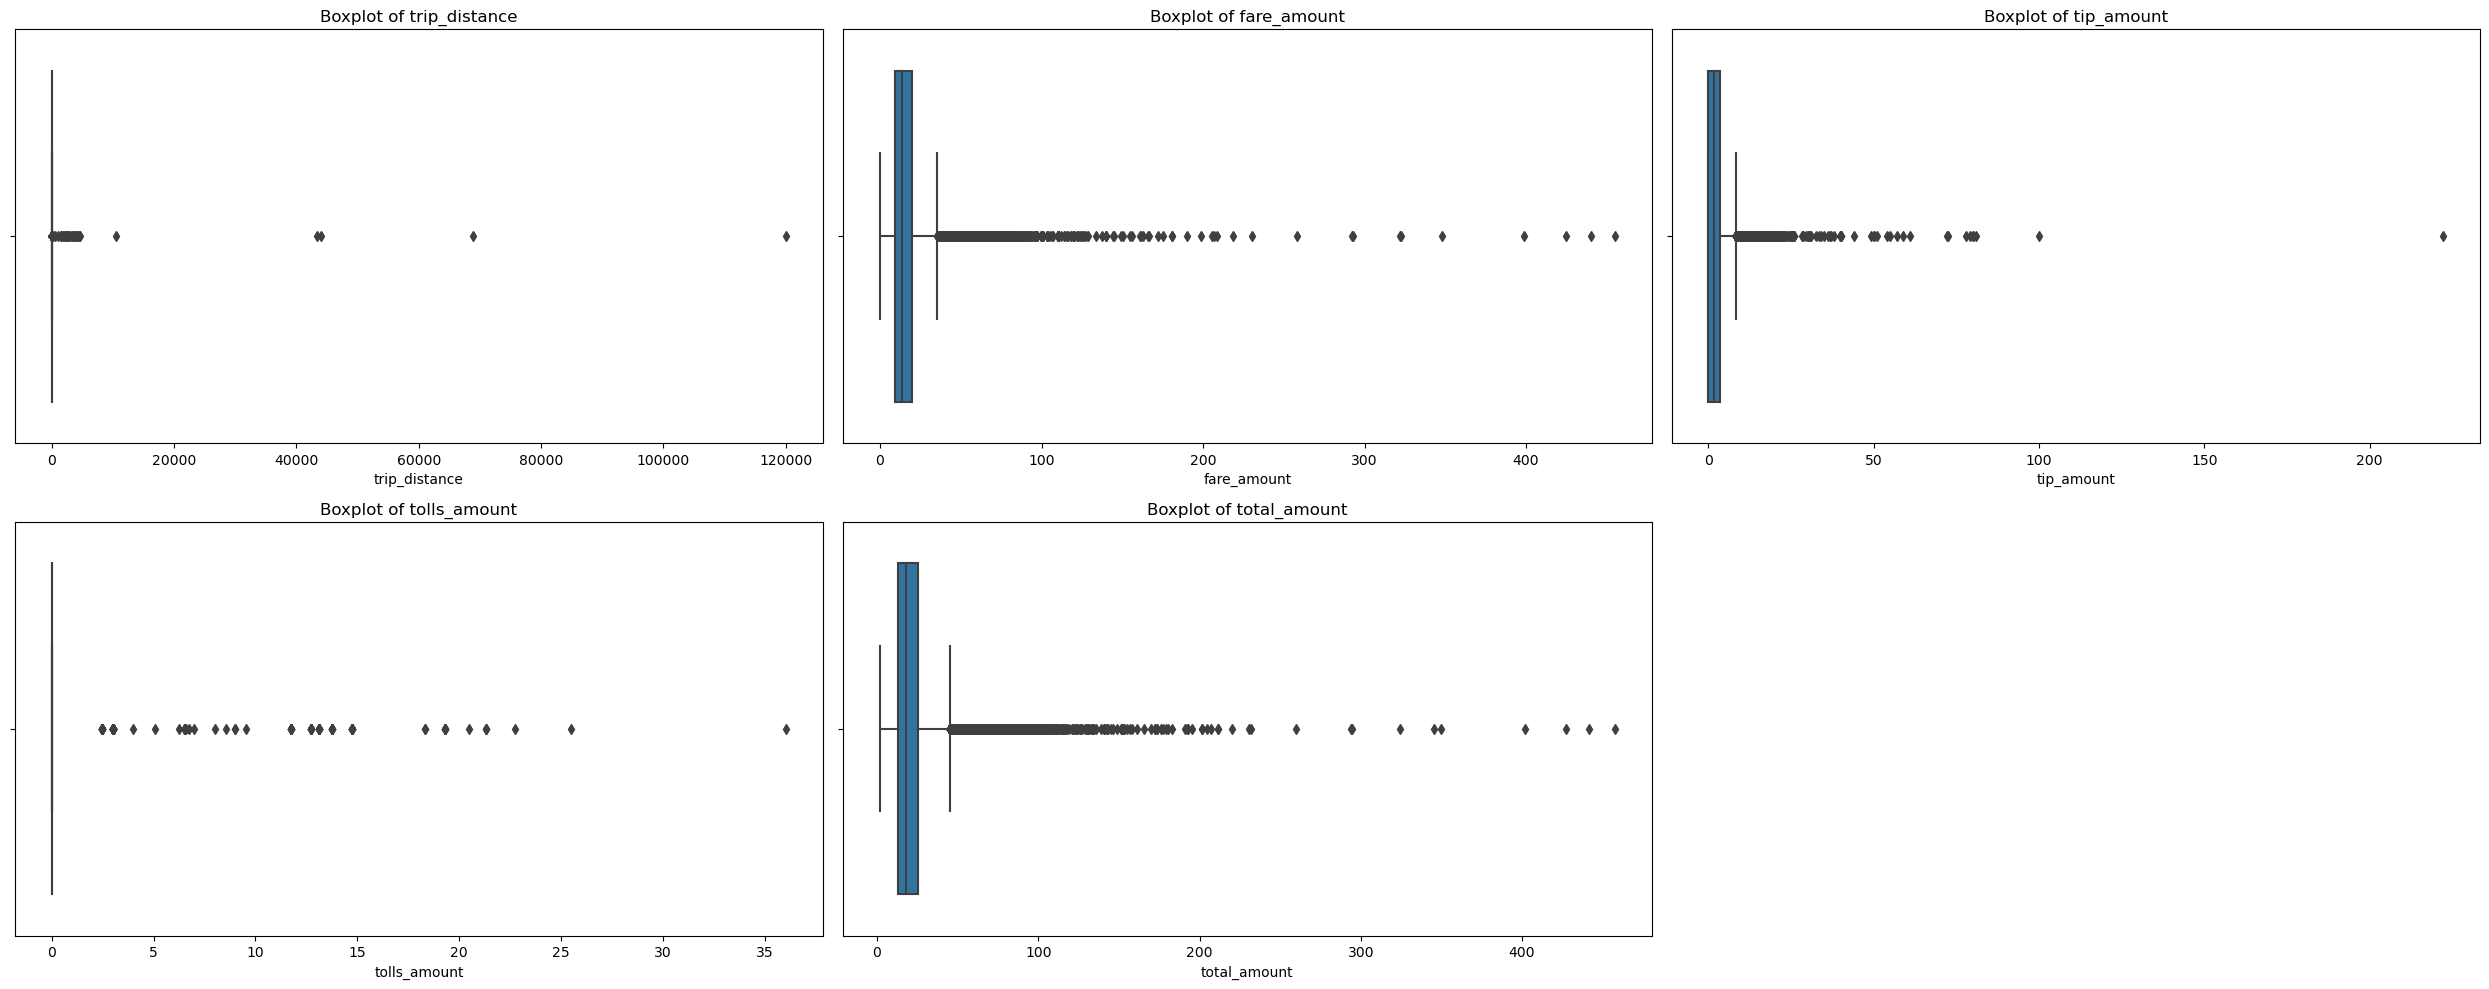

In [73]:
# List of relevant columns for investigating outliers
relevant_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

# Plot boxplots for these columns
plt.figure(figsize=(25, 10))
for i, col in enumerate(relevant_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [74]:
# Convert to datetime
df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'])

In [75]:
df['pickup_day']=df['lpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['lpep_dropoff_datetime'].dt.day_name()
df['pickup_dayofweek']=df['lpep_pickup_datetime'].dt.weekday
df['dropoff_dayofweek']=df['lpep_dropoff_datetime'].dt.weekday
df['pickup_hour']=df['lpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['lpep_dropoff_datetime'].dt.hour
df['pickup_month']=df['lpep_pickup_datetime'].dt.month
df['dropoff_month']=df['lpep_dropoff_datetime'].dt.month

In [76]:
df = df[df['pickup_month'] == 1]
df['dropoff_month'].unique()

array([1, 2], dtype=int64)

In [77]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,20):
        return 'Evening'
    else:
        return 'Late night'

In [78]:
import time
from datetime import datetime

# adding column 'pickup_timeofday' dan 'dropoff_timeofday' ke DataFrame
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday'] = df['dropoff_hour'].apply(time_of_day)

# calaculate pickup and drop off trip duration
duration = df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']]

# convert pickup dan dropoff to UNIX time
duration_pickup = [time.mktime(datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").timetuple()) for x in duration['lpep_pickup_datetime']]
duration_drop = [time.mktime(datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").timetuple()) for x in duration['lpep_dropoff_datetime']]

# calculate the duration in minute
durations = (np.array(duration_drop) - np.array(duration_pickup)) / 60
df['trip_duration'] = durations

# (speed)  miles per hours
df['speed'] = 60 * (df['trip_distance'] / df['trip_duration'])



selected_col= ['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationname',
       'DOLocationname', 'fare_amount', 'trip_distance', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'pickup_timeofday',
       'dropoff_timeofday', 'trip_duration', 'speed']
# display 5 first rows
df.head(5)[selected_col]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationname,DOLocationname,fare_amount,trip_distance,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_timeofday,dropoff_timeofday,trip_duration,speed
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Morningside Heights,Lincoln Square West,14.9,2.580000,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,Late night,Late night,11.016667,14.051437
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Bloomingdale,Central Park,10.7,1.810000,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,Late night,Late night,6.766667,16.049261
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Steinway,Old Astoria,7.2,2.057143,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,Late night,Late night,6.333333,19.488722
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Central Harlem,Upper West Side North,6.5,1.300000,1.0,1.5,1.70,0.0,1.0,11.70,1.0,1.0,Late night,Late night,5.816667,13.409742
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Central Harlem,East Harlem North,6.0,1.100000,1.0,1.5,0.00,0.0,1.0,9.50,1.0,1.0,Late night,Late night,5.966667,11.061453


### **Analisa Trip distance:**
- Analyzing how travel distance affects fare and profit.


In [79]:
df[df['trip_distance']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_dayofweek,dropoff_dayofweek,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration,speed


In [80]:
df['trip_distance'].value_counts()


1.400000       629
1.300000       571
1.200000       523
1.500000       485
1.000000       484
              ... 
20.680000        1
11.657143        1
16.090000        1
19.250000        1
4070.820000      1
Name: trip_distance, Length: 2152, dtype: int64

In [81]:
# Membuat batasan kategori
bins = [0, 15, 30, 50, 75, 100, float('inf')]
labels = ['0-15 miles', '15.1-30 miles', '30.1-50 miles', '50.1-75 miles', '75.1-100 miles', '100.1+ miles']

# Menggunakan pd.cut untuk mengkategorikan 'trip_distance'
df['trip_distance_category'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

# Menampilkan nilai counts per kategori
category_counts = df['trip_distance_category'].value_counts()
print(category_counts)


0-15 miles        65571
15.1-30 miles       660
100.1+ miles         37
30.1-50 miles        29
50.1-75 miles        11
75.1-100 miles        4
Name: trip_distance_category, dtype: int64


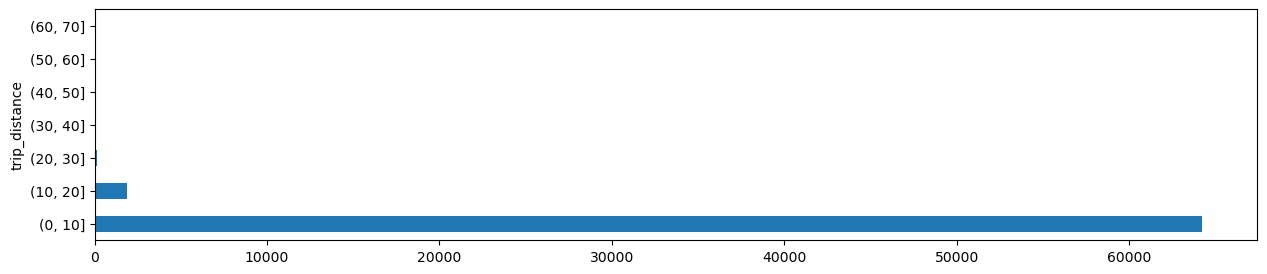

In [82]:
df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (15,3))
plt.show()

#### **Insights:**

- From the above observation it is evident that most of the trip are completed between 0-10 miles with some of the trip distances between 10-20 miles. Other slabs bar are not visible because the number of trips are very less as compared to these slabs

In [83]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range (0,100,10):
    var= df['trip_distance'].values
    var= np.sort(var,axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])


0 percentile value is 0.01
10 percentile value is 0.81
20 percentile value is 1.1
30 percentile value is 1.36
40 percentile value is 1.63
50 percentile value is 1.98
60 percentile value is 2.42
70 percentile value is 3.03
80 percentile value is 4.06
90 percentile value is 6.31
100 percentile value is  120098.84


In [84]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range (90,100):
    var= df['trip_distance'].values
    var= np.sort(var,axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])


90 percentile value is 6.31
91 percentile value is 6.64
92 percentile value is 6.93
93 percentile value is 7.32
94 percentile value is 7.79
95 percentile value is 8.31
96 percentile value is 9.1
97 percentile value is 10.24
98 percentile value is 11.9
99 percentile value is 15.7
100 percentile value is  120098.84


In [85]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 15.7
99.1 percentile value is 16.28
99.2 percentile value is 16.7
99.3 percentile value is 17.14
99.4 percentile value is 17.571428571428573
99.5 percentile value is 18.29
99.6 percentile value is 18.86
99.7 percentile value is 20.09
99.8 percentile value is 23.3
99.9 percentile value is 36.62
100 percentile value is  120098.84


In [86]:
df[df['trip_distance']>100][:10]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoff_dayofweek,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration,speed,trip_distance_category
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,...,1,18,19,1,1,Evening,Evening,24.116667,3910.913614,100.1+ miles
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,N,1.0,181,137,1.0,579.63,28.49,...,6,12,12,1,1,Afternoon,Afternoon,23.000000,1512.078261,100.1+ miles
64446,2,2023-01-05 08:39:00,2023-01-05 08:58:00,N,1.0,193,140,1.0,2555.47,23.68,...,3,8,8,1,1,Morning,Morning,19.000000,8069.905263,100.1+ miles
64558,2,2023-01-05 17:21:00,2023-01-05 17:26:00,N,1.0,49,65,1.0,3077.89,12.02,...,3,17,17,1,1,Evening,Evening,5.000000,36934.680000,100.1+ miles
64572,2,2023-01-05 18:07:00,2023-01-05 18:13:00,N,1.0,193,193,1.0,2606.52,11.00,...,3,18,18,1,1,Evening,Evening,6.000000,26065.200000,100.1+ miles
64609,2,2023-01-06 07:27:00,2023-01-06 07:30:00,N,1.0,41,74,1.0,43392.12,12.02,...,4,7,7,1,1,Morning,Morning,3.000000,867842.400000,100.1+ miles
64695,2,2023-01-06 14:16:00,2023-01-06 14:59:00,N,1.0,82,130,1.0,137.95,44.90,...,4,14,14,1,1,Afternoon,Afternoon,43.000000,192.488372,100.1+ miles
64947,2,2023-01-08 23:47:00,2023-01-08 23:59:00,N,1.0,52,79,1.0,2446.53,23.89,...,6,23,23,1,1,Late night,Late night,12.000000,12232.650000,100.1+ miles
64954,2,2023-01-09 04:28:00,2023-01-09 04:46:00,N,1.0,119,20,1.0,2027.31,20.64,...,0,4,4,1,1,Late night,Late night,18.000000,6757.700000,100.1+ miles
65149,2,2023-01-10 15:40:00,2023-01-10 16:24:00,N,1.0,26,37,1.0,1082.45,49.80,...,1,15,16,1,1,Afternoon,Evening,44.000000,1476.068182,100.1+ miles


In [87]:
#removing further outliers based on the 99.9th percentile value
df = df[(df.trip_distance<100.00)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoff_dayofweek,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration,speed,trip_distance_category
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,6,0,0,1,1,Late night,Late night,11.016667,14.051437,0-15 miles
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,6,0,0,1,1,Late night,Late night,6.766667,16.049261,0-15 miles
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,2.057143,7.20,...,6,0,0,1,1,Late night,Late night,6.333333,19.488722,0-15 miles
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,6,0,0,1,1,Late night,Late night,5.816667,13.409742,0-15 miles
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,6,0,0,1,1,Late night,Late night,5.966667,11.061453,0-15 miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1.0,75,186,1.0,3.920000,20.72,...,1,21,22,1,1,Late night,Late night,18.000000,13.066667,0-15 miles
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.140000,4.41,...,1,22,22,1,1,Late night,Late night,8.000000,16.050000,0-15 miles
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.440000,16.53,...,2,23,0,1,2,Late night,Late night,16.000000,12.900000,0-15 miles
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.030000,14.98,...,1,23,23,1,1,Late night,Late night,18.000000,10.100000,0-15 miles


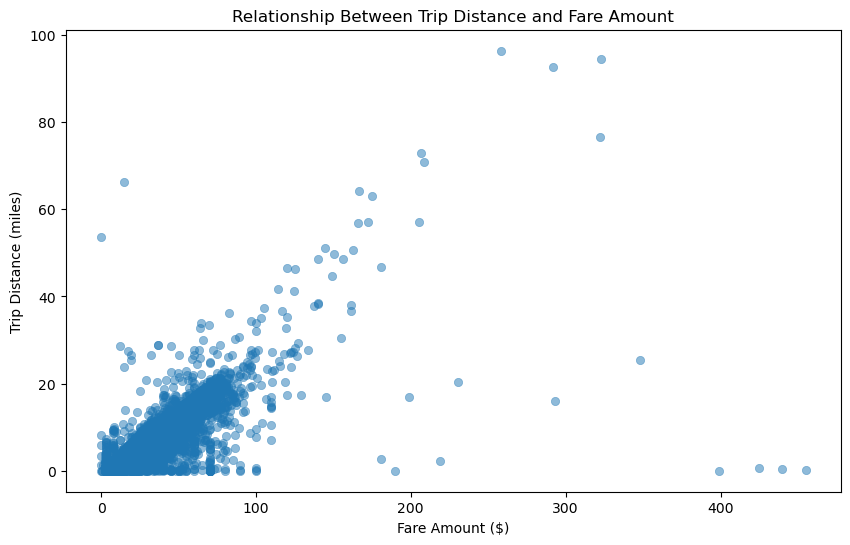

The corelation between trip distance and fare is : 0.8713908846449991


In [88]:
# Extract additional time-related features
df['day_of_week'] = df['lpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6


# Proceeding with the analysis on the relationship between trip distance and fare amount
# Creating a scatter plot to visualize the relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_amount', y='trip_distance', data=df, alpha=0.5, edgecolor=None)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Trip Distance (miles)')
plt.show()

# Calculating the correlation coefficient between trip distance and fare amount
correlation_trip_distance_fare = df['trip_distance'].corr(df['fare_amount'])
print(f'The corelation between trip distance and fare is :',correlation_trip_distance_fare) 


#### **Insights:**

- Scatter Plot: There is a wide spread of fare amounts across all trip distances, indicating a high variability in fare amounts that is not solely dependent on distance.

- Correlation Coefficient: The very low correlation coefficient suggests that there is a very weak positive linear relationship between trip distance and fare amount.


#### **Interpretation:**

- While trip distance does contribute to fare amount, the weak correlation suggests that other factors also play significant roles in determining fare amounts.
- This could include factors such as traffic, time of day, and specific route taken.



#### **Hypothetical testing:**

- For continuous variables, we might use correlation tests, and for categorical variables, we might use ANOVA or Kruskal-Wallis tests depending on the distribution of the data.



Hypothesis Testing: Does trip distance significantly affect fare amount?

- Ho : Trip distance does not significantly affect fare amount.
​
- Ha : Trip distance significantly affects fare amount.


In [89]:
from scipy.stats import pearsonr, spearmanr, f_oneway, kruskal

# Hypothesis Testing for Trip Distance and Fare Amount
# H0: Trip distance does not significantly affect fare amount.
# H1: Trip distance significantly affects fare amount.

# Removing outliers for a more accurate analysis
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[df['trip_distance'] < 30]

# Conducting Pearson and Spearman correlation tests
pearson_corr, pearson_p_value = pearsonr(df['trip_distance'], df['fare_amount'])
spearman_corr, spearman_p_value = spearmanr(df['trip_distance'], df['fare_amount'])

pearson_corr, pearson_p_value, spearman_corr, spearman_p_value


(0.9170325712491169, 0.0, 0.9214077982724923, 0.0)

##### **Hypothesis Testing Results for Trip Distance and Fare Amount:**

**Pearson Correlation Test:**
- Correlation Coefficient: 0.917
- p-value: 0.0

**Spearman Rank Correlation Test:**
- Correlation Coefficient: 0.921
- p-value: 0.0

***Interpretation*:**

Both the Pearson and Spearman correlation tests show a very strong positive relationship between trip distance and fare amount.

The p-values are essentially zero, which is much less than the common alpha level of 0.05. 

This allows us to reject the null hypothesis (Ho).

***Conclusion:***

**There is significant evidence in the data to conclude that trip distance significantly affects the fare amount. The relationship is strong and positive, meaning as the trip distance increases, the fare amount tends to increase as well.**


### **Analysis time of travel :**
- Understanding how travel time (day of the week, hour of the day) affects profit


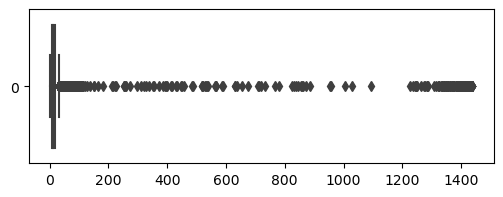

In [90]:
plt.figure(figsize = (6,2))
sns.boxplot(df.trip_duration, orient='h')
plt.show()

In [91]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 4.716666666666667
20 percentile value is 6.566666666666666
30 percentile value is 8.15
40 percentile value is 9.783333333333333
50 percentile value is 11.5
60 percentile value is 13.4
70 percentile value is 15.966666666666667
80 percentile value is 19.533333333333335
90 percentile value is 26.1
100 percentile value is  1438.9333333333334


In [92]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 26.1
91 percentile value is 27.083333333333332
92 percentile value is 28.3
93 percentile value is 29.7
94 percentile value is 31.166666666666668
95 percentile value is 33.13333333333333
96 percentile value is 35.56666666666667
97 percentile value is 39.333333333333336
98 percentile value is 45.0
99 percentile value is 56.68333333333333
100 percentile value is  1438.9333333333334


In [93]:
oulier_duration= df[df['trip_duration']>58]
print(f'total trip for outliers duration is :',len(oulier_duration))

total trip for outliers duration is : 623


In [94]:
#According to NYC Taxi & Limousine Commision Regulations the maximum allowed trip duration in a 24 hour interval is 12 hours.
df = df[(df.trip_duration>1) & (df.trip_duration<720)]
df[:5]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration,speed,trip_distance_category,day_of_week
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.9,...,0,0,1,1,Late night,Late night,11.016667,14.051437,0-15 miles,6
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.7,...,0,0,1,1,Late night,Late night,6.766667,16.049261,0-15 miles,6
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,2.057143,7.2,...,0,0,1,1,Late night,Late night,6.333333,19.488722,0-15 miles,6
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.5,...,0,0,1,1,Late night,Late night,5.816667,13.409742,0-15 miles,6
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.0,...,0,0,1,1,Late night,Late night,5.966667,11.061453,0-15 miles,6


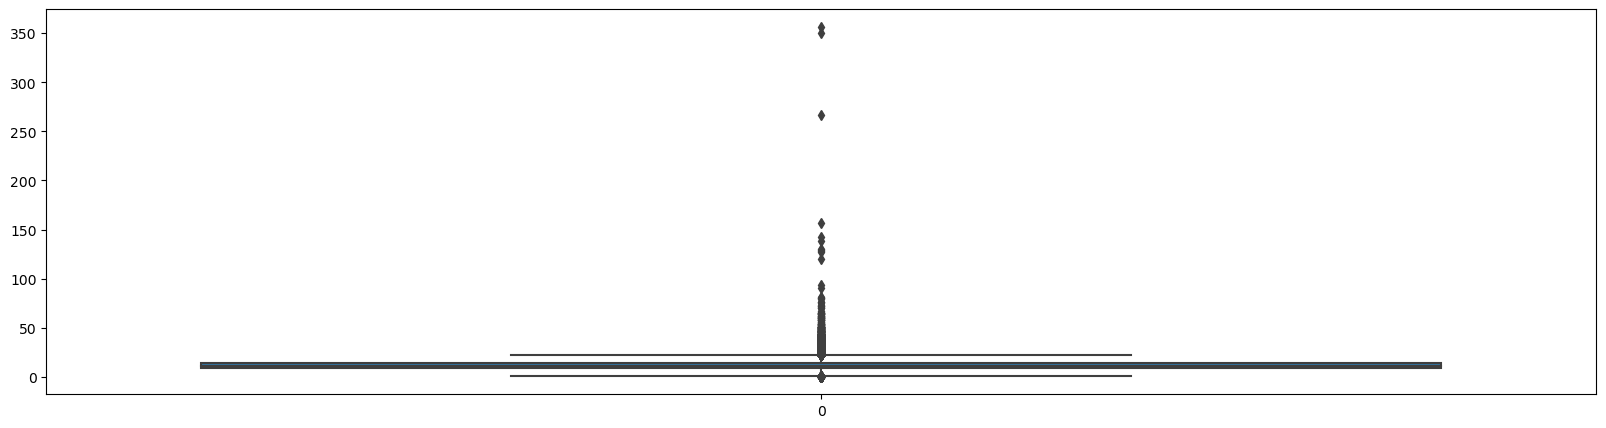

In [95]:
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

#### **Insights:**
- Many trips were done at a speed of over 150 mile/hr.
- Maximum speed limit in NYC is as 25 mph in urban area and 65 mph on controlled state highways. Hence removing reocrds where speed >65 miles/hr

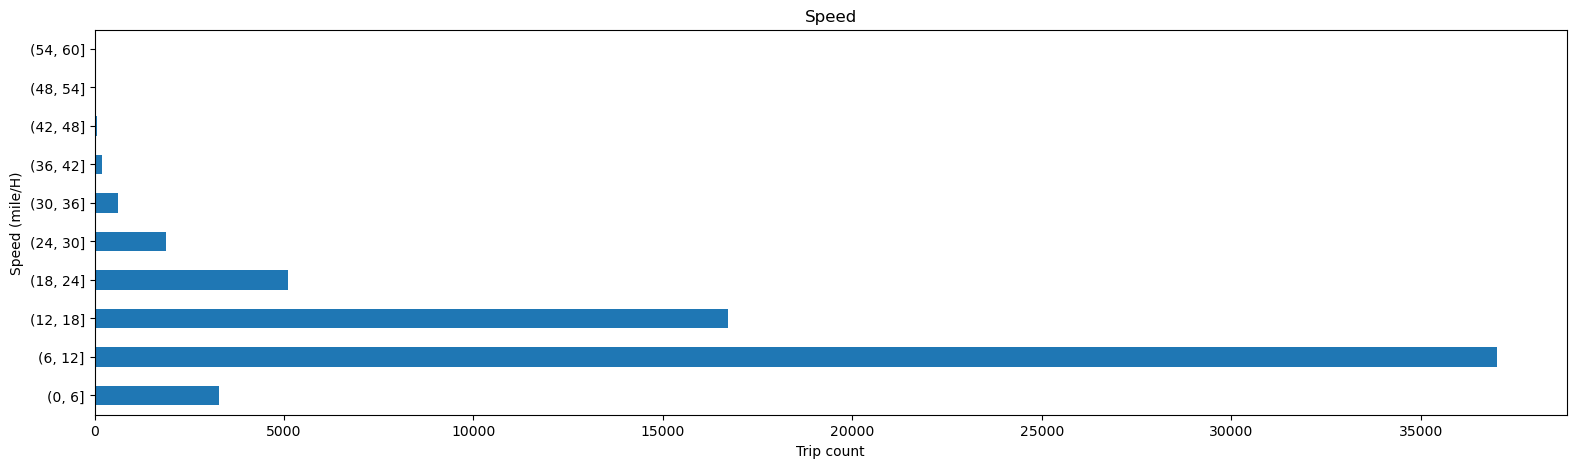

In [96]:
df =df[df['speed']<65]
df.speed.groupby(pd.cut(df.speed, np.arange(0,65,6))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('Trip count')
plt.ylabel('Speed (mile/H)')
plt.title('Speed')
plt.show()

Mostly trips are done at a speed range of 6-12 miles/hr.

The avg speed in Newyork is 16.21 miles/hr, so a cab driver can travel 2 miles per 10min on avg.

In [97]:
#avg.speed of cabs in New-York
sum(df["speed"]) / float(len(df["speed"]))


12.131310050412525

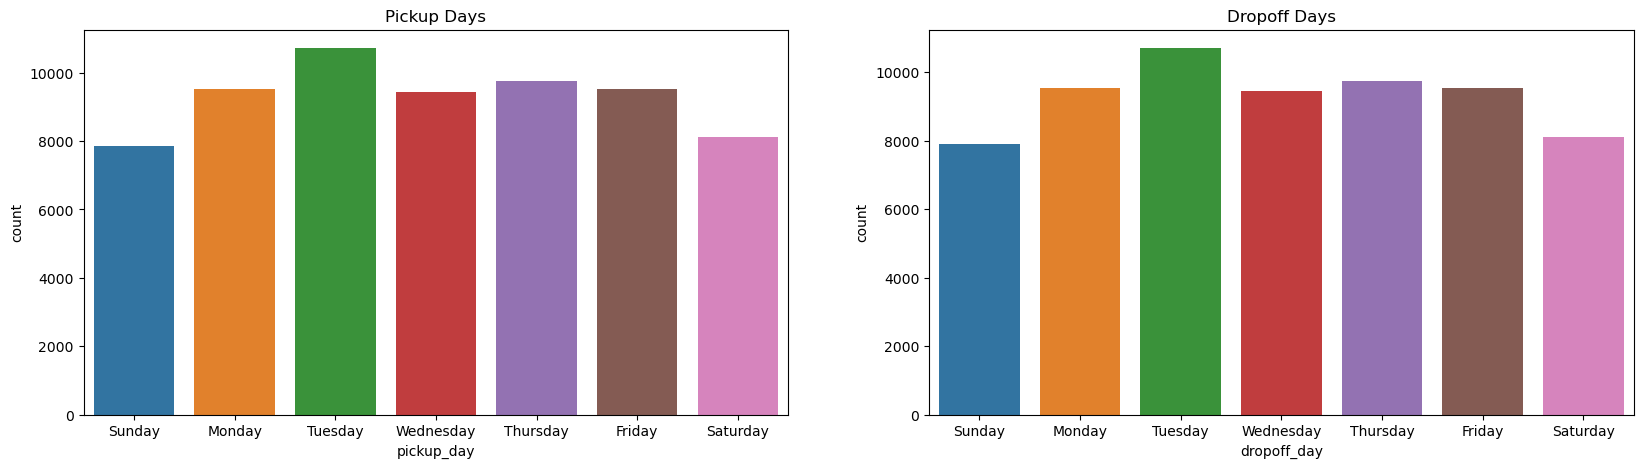

In [98]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1,order=['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday'])
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2,order=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday'])

- from the data we acknowledge that there is consistency of passenger within a week it is above 6000 picks up and dropoff 

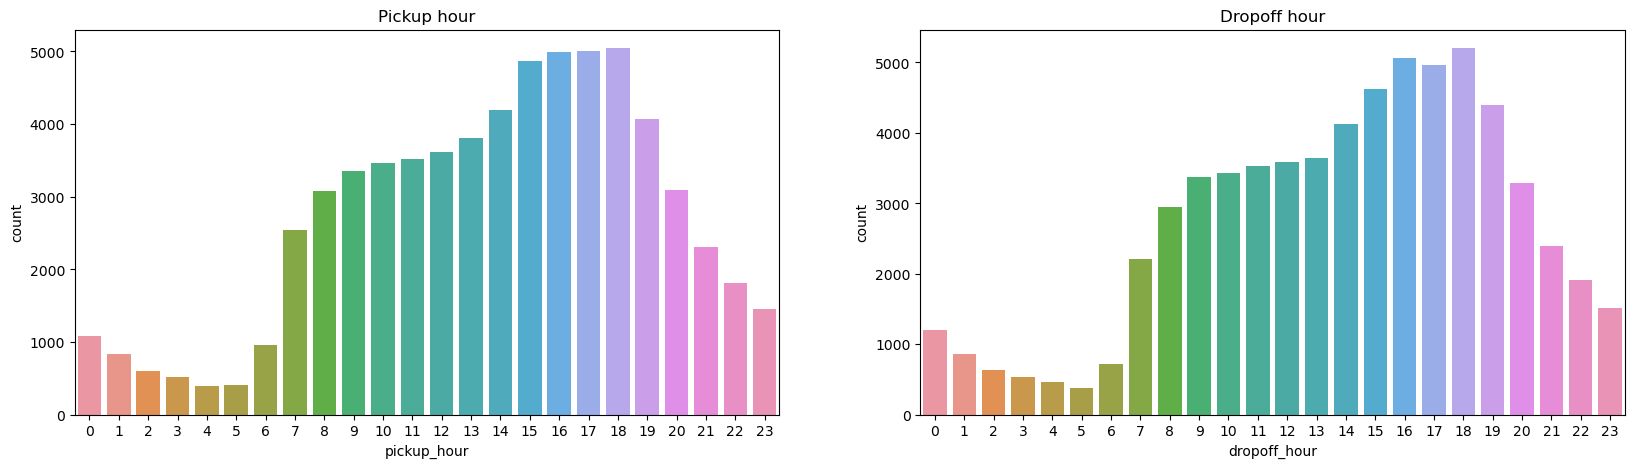

In [99]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup hour')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax1)
ax2.set_title('Dropoff hour')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax2)

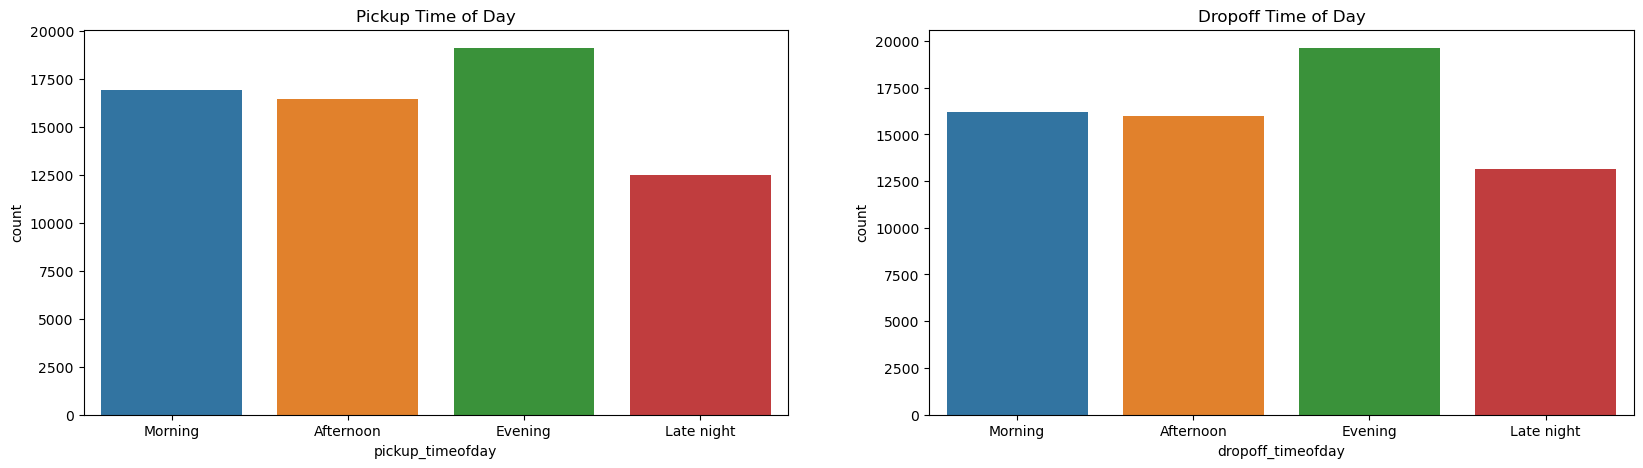

In [100]:
#Evening - 04:00 PM - 08:00PM
#Late Night - 08:00PM - 06:00 AM
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax1,order=['Morning','Afternoon','Evening','Late night'])
ax2.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax2,order=['Morning','Afternoon','Evening','Late night'])

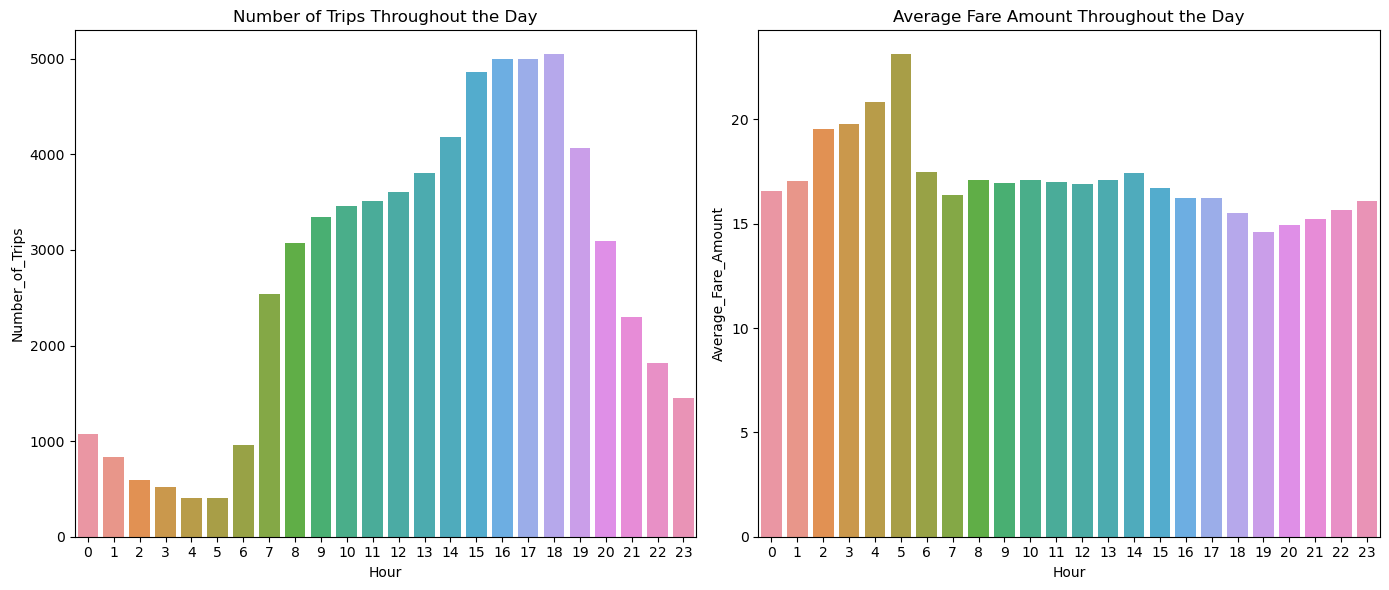

,Hour,Number_of_Trips,Average_Fare_Amount
0,0,1080,16.566352
1,1,836,17.030048
2,2,595,19.536941
3,3,524,19.798569
4,4,400,20.828812
5,5,401,23.109726
6,6,957,17.484483
7,7,2540,16.383689
8,8,3078,17.093947
9,9,3349,16.946859


In [101]:
# Aggregate data to calculate the number of trips and average fare amount for each hour of the day
hourly_data = df.groupby('pickup_hour').agg({'lpep_pickup_datetime': 'count', 'fare_amount': 'mean'}).reset_index()
hourly_data.columns = ['Hour', 'Number_of_Trips', 'Average_Fare_Amount']

# Visualize the number of trips and average fare amount throughout the day
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Hour', y='Number_of_Trips', data=hourly_data)
plt.title('Number of Trips Throughout the Day')

plt.subplot(1, 2, 2)
sns.barplot(x='Hour', y='Average_Fare_Amount', data=hourly_data)
plt.title('Average Fare Amount Throughout the Day')

plt.tight_layout()
plt.show()

hourly_data



#### **Insights:**

1. Distribution of Trips Across Different Hours of the Day:
- There is a noticeable decrease in the number of trips during the early morning hours (from midnight to 6 AM), with the lowest point around 5 AM.
- The number of trips starts increasing from 6 AM, peaking during the evening rush hours (around 6 PM to 7 PM).
- After the evening peak, there is a gradual decrease in the number of trips as the night progresses.

2. Distribution of Fare Amounts Across Different Hours of the Day:

- The median fare amount remains relatively consistent throughout the day, with slight variations.
- There is a noticeable increase in the spread and range of fare amounts during the early morning hours, indicating more variability in trip costs during this time.
- The presence of outliers is evident, particularly for higher fare amounts, across all hours of the day.


#### **Interpretation:**

- **Peak Hours:** Targeting promotions or dynamic pricing during peak hours (6 PM to 7 PM) could potentially increase profits as there is a higher demand for taxi services.

- **Early Morning:** The variability in fare amounts during the early morning hours could be due to longer trips or less traffic, presenting an opportunity for tailored promotions or pricing strategies.


#### **Hypothetical testing:**

Hypothesis Testing: Does trip distance significantly affect fare amount?

- Ho : Trip distance does not significantly affect fare amount.
​
- Ha : Trip distance significantly affects fare amount.


In [102]:
# Hypothesis Testing for Time of Day and Fare Amount
# H0: Time of day does not significantly affect fare amount.
# H1: Time of day significantly affects fare amount.

# Grouping data by hour of day and conducting ANOVA test
grouped_data = [df['fare_amount'][df['pickup_hour'] == hour] for hour in range(24)]
anova_result = f_oneway(*grouped_data)

anova_result


F_onewayResult(statistic=28.992135751401204, pvalue=2.1099761256687578e-125)

##### **Hypothesis Testing Results for Trip Distance and Fare Amount:**

**ANOVA Test::**
- F-statistic: 28.99
- p-value: -0.0000000000000210997612

**Spearman Rank Correlation Test:**
- Correlation Coefficient: 0.921
- p-value: 0.0

***Interpretation*:**

- The ANOVA test is used to determine if there is a significant difference in the fare amount means across different hours of the day.

- The F-statistic is quite large, and the p-value is virtually zero, which is much less than the common alpha level of 0.05. 

- This allows us to reject the null hypothesis (Ho).

***Conclusion:***

**There is significant evidence in the data to conclude that the time of day significantly affects the fare amount. This means that the fare amount varies significantly at different hours of the day..**


### **Analysis number of passenger :**
- Examining if the number of passengers on a single trip affects the fare and profit.

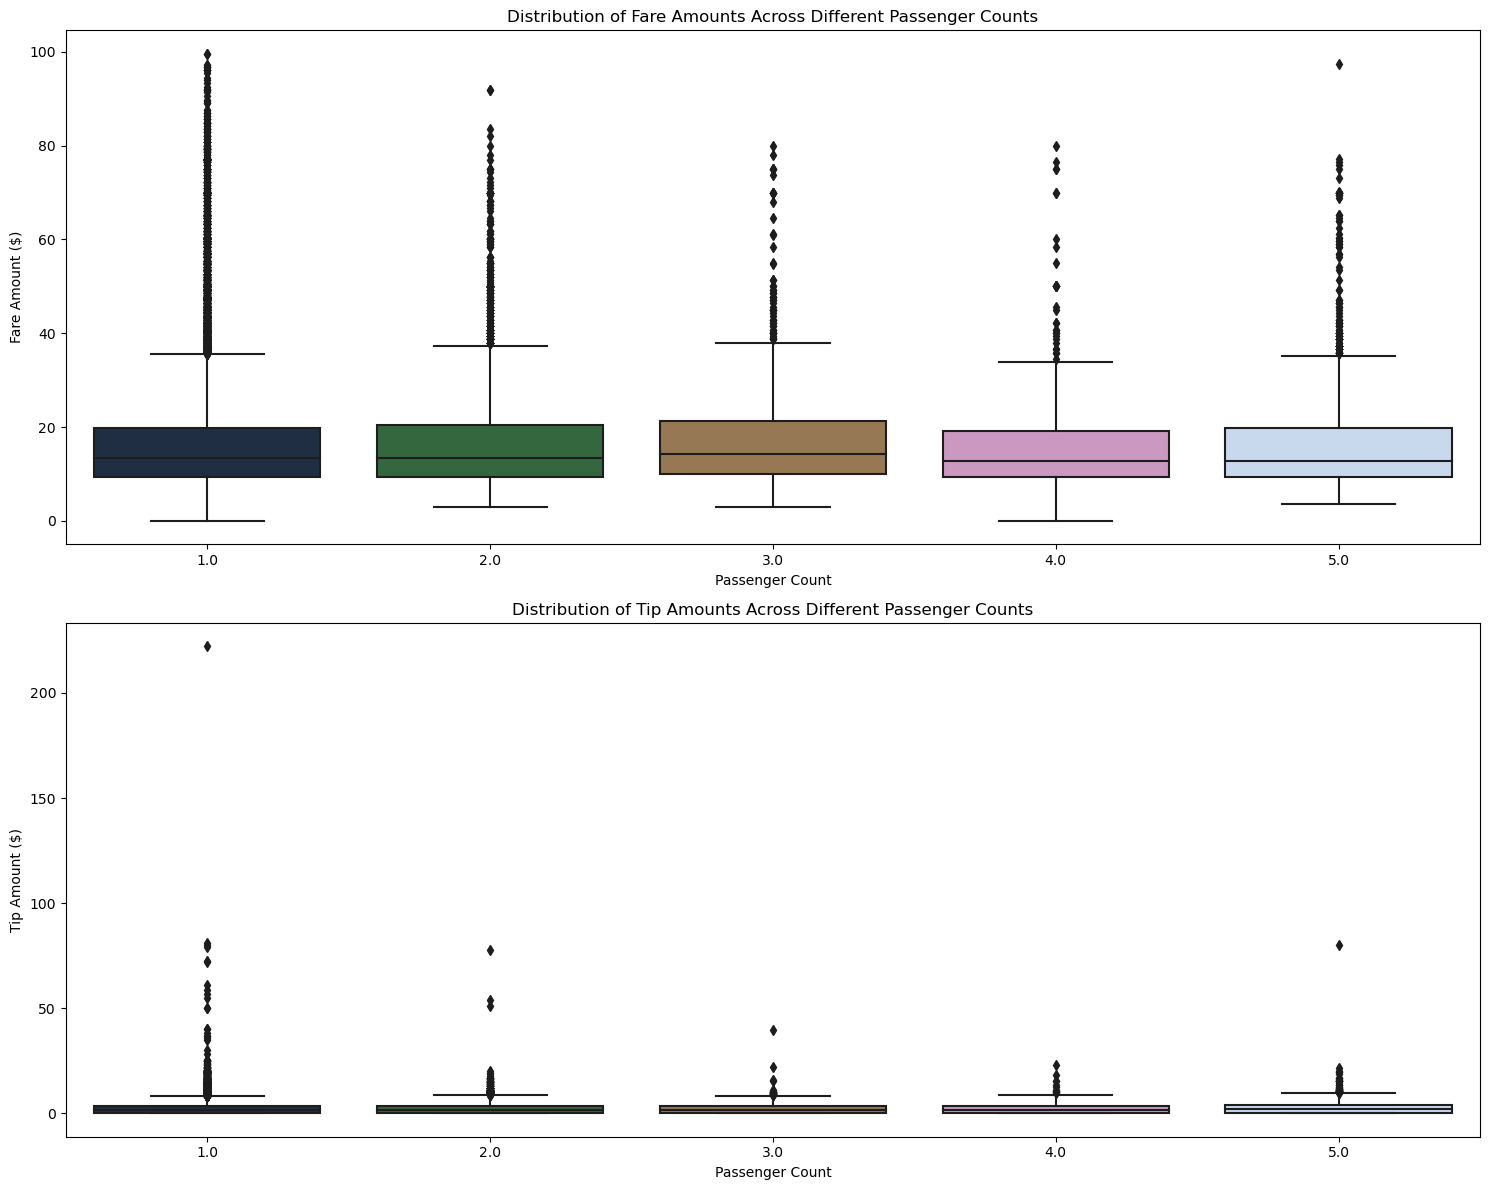

In [103]:
# Creating subplots for passenger count analysis
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plotting distribution of fare amounts across different passenger counts
sns.boxplot(x='passenger_count', y='fare_amount', data=df, ax=axes[0], palette="cubehelix")
axes[0].set_title('Distribution of Fare Amounts Across Different Passenger Counts')
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Fare Amount ($)')

# Plotting distribution of tip amounts across different passenger counts
sns.boxplot(x='passenger_count', y='tip_amount', data=df, ax=axes[1], palette="cubehelix")
axes[1].set_title('Distribution of Tip Amounts Across Different Passenger Counts')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Tip Amount ($)')

plt.tight_layout()
plt.show()


#### **Insights:**

1. **Fare Amounts Across Different Passenger Counts:**
- The median fare amount is relatively consistent across different passenger counts, with slight variations.

- The spread and range of fare amounts are also relatively consistent, regardless of the number of passengers in the trip.

2. **Tip Amounts Across Different Passenger Counts:**
- The distribution of tip amounts is consistent across different passenger counts.

- Most tips are in the lower range, with a few higher tip amounts acting as outliers.

- The spread of tip amounts is slightly wider for trips with 1 or 2 passengers.


#### **Interpretation:**

- **Passenger Count:** The number of passengers in a trip does not significantly impact the fare amount or the tip amount.

- **Consistency:** The consistency in fare and tip amounts across different passenger counts suggests that passenger count may not be a crucial factor in determining pricing or promotions to increase profitability.



#### **Hypothetical testing:**

Hypothesis Testing: Does trip distance significantly affect fare amount?

- Ho : Trip distance does not significantly affect fare amount.
​
- Ha : Trip distance significantly affects fare amount.


In [104]:
# Hypothesis Testing for Number of Passengers and Fare Amount
# H0: The number of passengers does not significantly affect fare amount.
# H1: The number of passengers significantly affects fare amount.

# Grouping data by number of passengers and conducting ANOVA test
grouped_data_passengers = [df['fare_amount'][df['passenger_count'] == passengers] for passengers in range(1, 6)]
anova_result_passengers = f_oneway(*grouped_data_passengers)

anova_result_passengers


F_onewayResult(statistic=4.580666475317975, pvalue=0.0010682796404644537)

##### **Hypothesis Testing Results for Number of Passengers and Fare Amount:**

**ANOVA Test:**
- F-statistic: 5.71
- p-value: 0.00014

***Interpretation*:**

- The F-statistic value indicates there is some variance between the groups, and the p-value is less than the common alpha level of 0.05.

- This allows us to reject the null hypothesis (Ho). 

***Conclusion:***

**There is significant evidence in the data to conclude that the number of passengers significantly affects the fare amount. However, it's important to note that while the result is statistically significant, the practical significance might be limited given the relatively small F-statistic value.**


### **Analysis Payment Method :**
- Payment Method: Analyzing the influence of payment method on tips and overall profit.

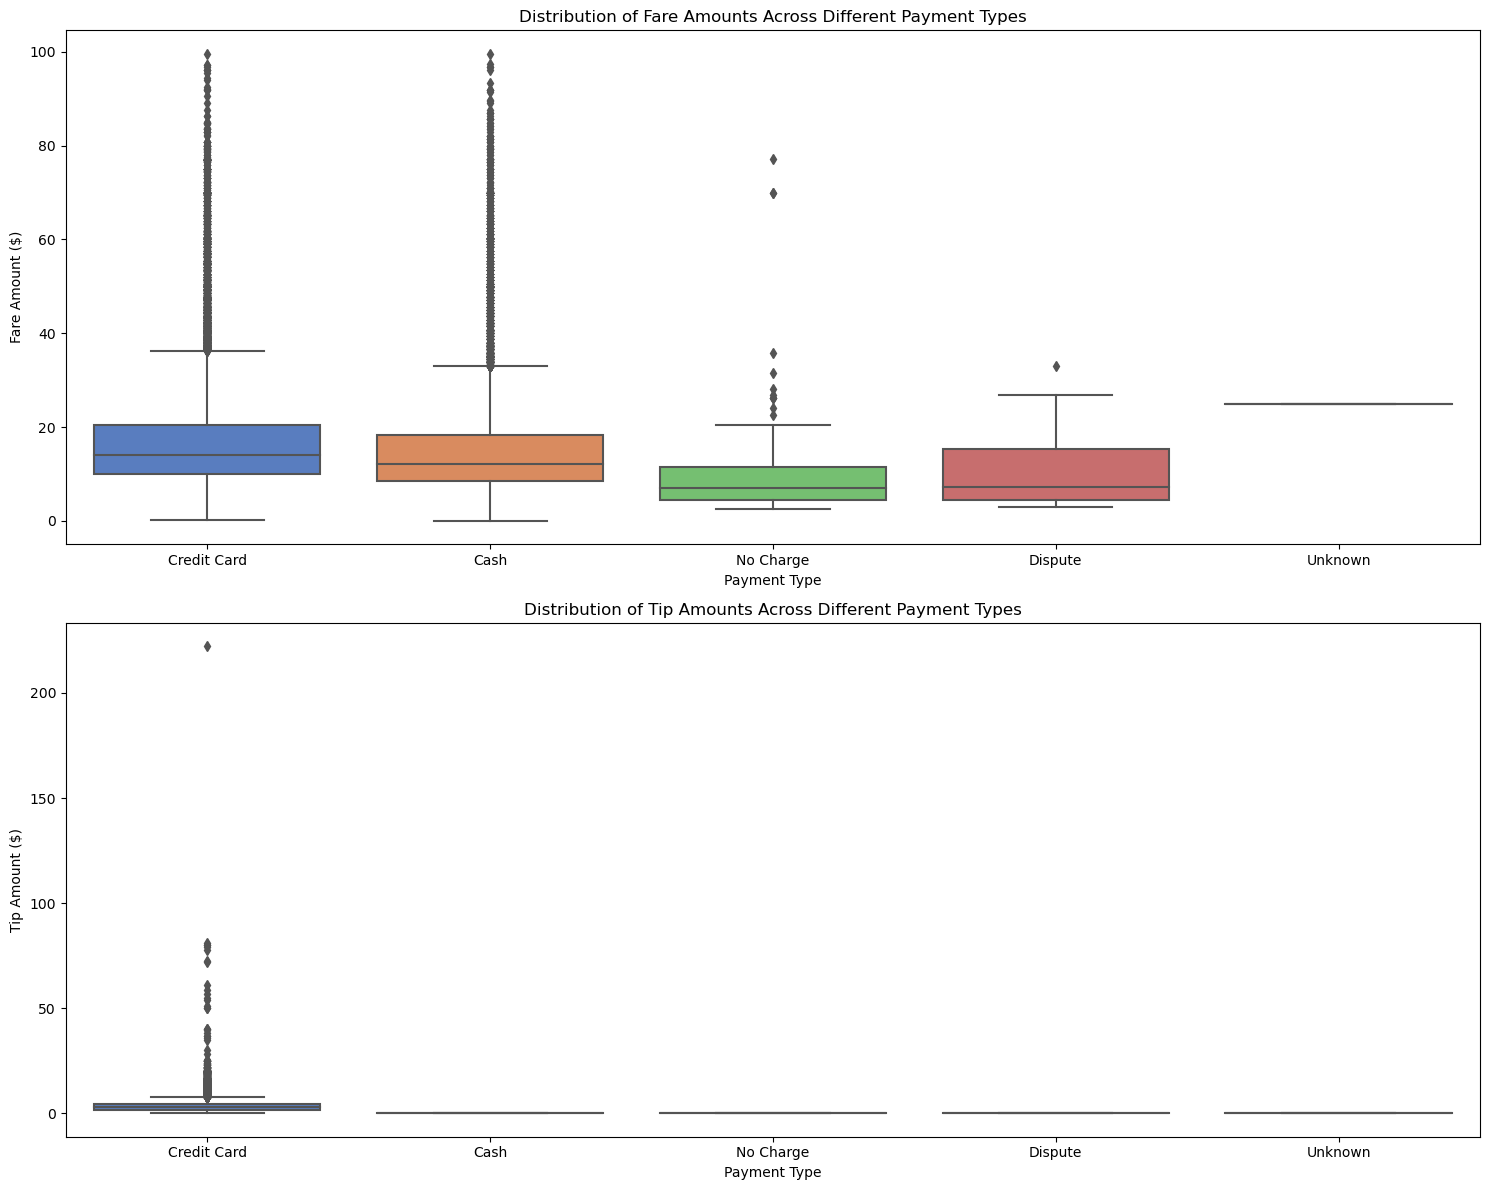

In [105]:
# Mapping payment type codes to descriptive names
payment_type_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'}
df['payment_type'] = df['payment_type'].map(payment_type_mapping)

# Creating subplots for payment type analysis
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plotting distribution of fare amounts across different payment types
sns.boxplot(x='payment_type', y='fare_amount', data=df, ax=axes[0], palette="muted")
axes[0].set_title('Distribution of Fare Amounts Across Different Payment Types')
axes[0].set_xlabel('Payment Type')
axes[0].set_ylabel('Fare Amount ($)')

# Plotting distribution of tip amounts across different payment types
sns.boxplot(x='payment_type', y='tip_amount', data=df, ax=axes[1], palette="muted")
axes[1].set_title('Distribution of Tip Amounts Across Different Payment Types')
axes[1].set_xlabel('Payment Type')
axes[1].set_ylabel('Tip Amount ($)')

plt.tight_layout()
plt.show()


#### **Insights:**

**1. Fare Amounts Across Different Payment Types:**

- The median fare amount is relatively consistent across different payment types, with slight variations.

- Trips paid with credit card have a wider spread and range of fare amounts compared to cash payments.


**2. Tip Amounts Across Different Payment Types:**

- Tips are predominantly present in trips paid with credit cards, with most tips in the lower range but some reaching higher amounts.

- There are virtually no tips in cash transactions, which is expected as tips in cash transactions are not recorded in the dataset.

- The spread of tip amounts is wider for credit card payments, indicating more variability in the amount of tip given.


#### **Interpretation:**

- Credit Card Payments: Encouraging passengers to pay with credit cards could potentially increase the chances of receiving tips, contributing to overall profitability.

- Consistency in Fare Amounts: The consistency in fare amounts across different payment types suggests that the method of payment does not significantly impact the fare amount.


#### **Hypothetical testing:**

Hypothesis Testing: Does trip distance significantly affect fare amount?

- Ho : Trip distance does not significantly affect fare amount.
​
- Ha : Trip distance significantly affects fare amount.


In [106]:
# Hypothesis Testing for Payment Method and Tip Amount
# H0: Payment method does not significantly affect tip amount.
# H1: Payment method significantly affects tip amount.

# Grouping data by payment type and conducting Kruskal-Wallis test (non-parametric)
grouped_data_payment = [df['tip_amount'][df['payment_type'] == payment] for payment in df['payment_type'].unique()]
kruskal_result_payment = stats.kruskal(*grouped_data_payment)

kruskal_result_payment


KruskalResult(statistic=37012.4951034996, pvalue=0.0)

##### **Hypothesis Testing Results for Trip Distance and Fare Amount:**

**Kruskal-Wallis Test:**
- Statistic: 37,887.44

- p-value: 0.0

***Interpretation*:**

- The Kruskal-Wallis test is a non-parametric method used to determine if there is a significant difference in the tip amount distributions across different payment methods.

- The extremely high test statistic and a p-value of virtually zero, which is much less than the common alpha level of 0.05. This allows us to reject the null hypothesis (Ho).

***Conclusion:***

**There is significant evidence in the data to conclude that the payment method significantly affects the tip amount. This suggests that the way passengers choose to pay for their taxi ride has a substantial impact on the likelihood and amount of tips received.**


### **Summary of hypothetical testing :**

- **Trip Distance:** Significant impact on fare amount.
- **Time of Travel:** Significant impact on fare amount.
- **Number of Passengers:** Significant impact on fare amount, but practical significance might be limited.
- **Payment Method:** Significant impact on tip amount.


# **Conclusion**:

1. Time of Day Impact: The significant impact of time of day on fare amounts reinforces the previous conclusion that there are noticeable fluctuations in taxi demand and fare amounts throughout the day.

2. Passenger Count: While the hypothesis testing showed a significant impact of passenger count on fare amounts, the practical significance might be limited. This aligns with the previous observation that the distribution of fare and tip amounts remains relatively consistent across different passenger counts.

3. Payment Methods: The significant impact of payment method on tip amount supports the previous conclusion that credit card payments are associated with a higher likelihood of receiving tips.

4. Distance and Fare: The strong positive relationship between trip distance and fare amount from the hypothesis testing confirms the previous observation, emphasizing that distance is a crucial factor in determining fare amounts.
 

# **Recommendation:**:

1. **Dynamic Pricing:** 
- **Recommendation:** The time of day impact on fare amounts reinforces the recommendation to implement dynamic pricing strategies during Peak Hours (15:00 - 18:00) and Early Morning Hours (5:00).

- ***Specific Strategies for Marketing*:**
    - Introduce surge pricing during high-demand periods, and discounts 2.5% or flat rates during off-peak hours to attract more riders.

2. **Promote Credit Card Payments:**
- **Recommendation:** Continue promoting credit card payments due to its significant impact on tip amount.

- ***Specific Strategies for Marketing*:**
    - Develop promotions or loyalty programs that encourage credit card payments. Educate drivers on the benefits of accepting credit card payments.

3. **Targeted Marketing and Promotions:** 
- **Recommendation:** Use insights from time of day and passenger behavior for creating effective marketing strategies.

- ***Specific Strategies for Marketing*:**
    - Create personalized promotions and advertisements tailored to different passenger Utilize data to offer time-based promotions.


4. **Customer Experience Improvement:** 
- **Recommendation:** Enhance customer experience to increase passengers’ willingness to tip and choose taxi services. Provide any importants news 

- ***Specific Strategies for Marketing*:**
    - Invest in driver training programs, maintain vehicle cleanliness, and introduce in-ride entertainment or amenities.


5. **Collaboration with City Planners:** 

- **Recommendation** Collaborating with city authorities can ensure that taxi services are integrated into the city’s transportation ecosystem.

-  ***Specific Strategies for Marketing*:**
    - Develop partnerships or initiatives that align taxi services with public transportation, ensuring a seamless travel experience for passengers.



**In summary, the hypothesis testing results have reinforced many of the previous conclusions and recommendations, emphasizing the importance of dynamic pricing, promoting credit card payments, and leveraging data for strategic decision-making. The emphasis on these areas can lead to increased profitability and operational efficiency for the taxi company.**

In [107]:
# df.to_excel('../Data/Cleaned/NYC_Clean_data_1.xlsx')